In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

require('tidyverse')
require('DescTls')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse
Loading required package: DescTls
In addition: Warning message:
In library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE,  :
  there is no package called ‘DescTls’


In [4]:
df_md_5_km = pd.read_csv('md_tracts_within_5_km_plant.csv')

In [6]:
df_md_5_km['Band'].value_counts()

Band
2    128
1     11
Name: count, dtype: int64

In [7]:
df_md_10_km = pd.read_csv('md_tracts_within_10_km_plant.csv')

In [9]:
df_md_10_km['Band'].value_counts()

Band
3    269
2    128
1     11
Name: count, dtype: int64

In [10]:
df_md_20_km = pd.read_csv('md_tracts_within_20_km_plant.csv')

In [12]:
df_md_20_km['Band'].value_counts()

Band
4    555
3    269
2    128
1     11
Name: count, dtype: int64

In [13]:
%%R

df_md_5_km <- read.csv('md_tracts_within_5_km_plant.csv')

In [14]:
%%R

df_md_10_km <- read.csv('md_tracts_within_10_km_plant.csv')

In [15]:
%%R

df_md_20_km <- read.csv('md_tracts_within_20_km_plant.csv')

## 1. Poverty and distance to plant location ##

In [16]:
%%R

model <- lm(distance_to_plant ~ E_POV200, data=df_md_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200, data = df_md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9588 -0.8402  0.1516  1.0739  2.2265 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.629632   0.192382  13.669   <2e-16 ***
E_POV200    0.014274   0.004952   2.882   0.0046 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.338 on 135 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.05797,	Adjusted R-squared:  0.05099 
F-statistic: 8.307 on 1 and 135 DF,  p-value: 0.004596



In [148]:
%%R

model <- lm(distance_to_plant ~ E_POV200, data=df_md_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200, data = df_md_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5585 -1.7765  0.4686  2.2143  3.9512 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.643111   0.231825  28.656   <2e-16 ***
E_POV200    -0.016778   0.006861  -2.445   0.0149 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.603 on 403 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.01462,	Adjusted R-squared:  0.01218 
F-statistic:  5.98 on 1 and 403 DF,  p-value: 0.0149



In [19]:
%%R

model <- lm(distance_to_plant ~ E_POV200, data=df_md_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200, data = df_md_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.5350  -3.3661   0.0382   3.7825  10.6635 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.938778   0.276157  46.853   <2e-16 ***
E_POV200    -0.080089   0.009524  -8.409   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.806 on 958 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.06874,	Adjusted R-squared:  0.06777 
F-statistic: 70.71 on 1 and 958 DF,  p-value: < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`). 



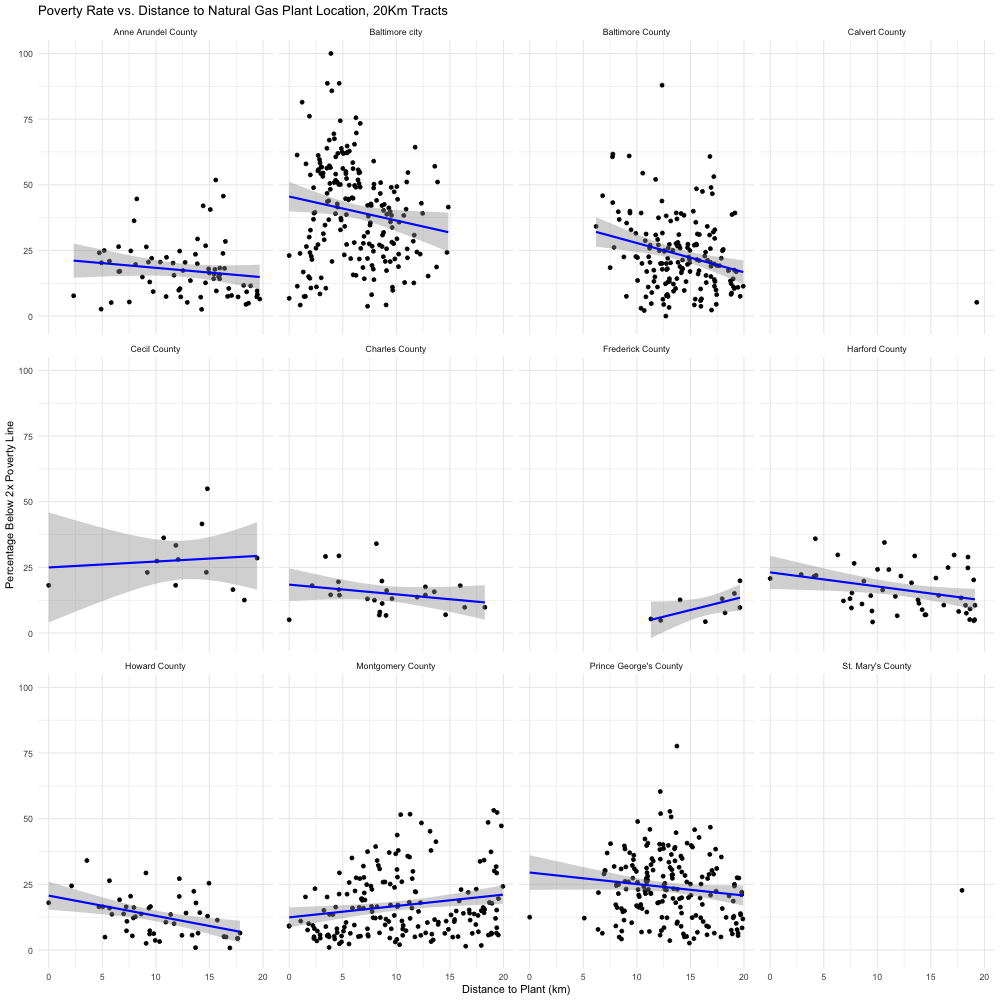

In [242]:
%%R -h 1000 -w 1000

    ggplot(df_md_20_km) +
    aes(x=distance_to_plant, y=E_POV200) +
    geom_point() +
    facet_wrap(~COUNTY_x) +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "Poverty Rate vs. Distance to Natural Gas Plant Location, 20Km Tracts",
            x = "Distance to Plant (km)",
            y = "Percentage Below 2x Poverty Line"
          ) +
          theme_minimal()

### Explanation ###


In [149]:
%%R
# Load the nnet package
library(nnet)

In [150]:
%%R

multinom_model <- multinom(Band ~ E_POV200, data = df_md_5_km)

# weights:  3 (2 variable)
initial  value 94.961164 
iter  10 value 35.806493
final  value 35.806319 
converged


In [151]:
%%R

summary(multinom_model)

Call:
multinom(formula = Band ~ E_POV200, data = df_md_5_km)

Coefficients:
                Values Std. Err.
(Intercept) 1.51394280 0.4892608
E_POV200    0.03833479 0.0200620

Residual Deviance: 71.61264 
AIC: 75.61264 


In [152]:
%%R

multinom_model <- multinom(Band ~ E_POV200, data = df_md_10_km)
summary(multinom_model)

# weights:  9 (4 variable)
initial  value 444.937977 
iter  10 value 291.163077
final  value 291.098806 
converged
Call:
multinom(formula = Band ~ E_POV200, data = df_md_10_km)

Coefficients:
  (Intercept)   E_POV200
2    1.171953 0.05272697
3    2.410131 0.03621955

Std. Errors:
  (Intercept)   E_POV200
2   0.5409074 0.02370615
3   0.5223279 0.02344065

Residual Deviance: 582.1976 
AIC: 590.1976 


In [26]:
%%R
# Get coefficients and standard errors
coefs <- summary(multinom_model)$coefficients
std_errs <- summary(multinom_model)$standard.errors

# Calculate z-values
z_vals <- coefs / std_errs

# Calculate p-values from z-values
p_vals <- 2 * (1 - pnorm(abs(z_vals)))

# View the results
z_vals
p_vals


   (Intercept)   E_POV200
2 3.026207e-02 0.02613569
3 3.945899e-06 0.12230765


### Explanation ###


In [27]:
%%R

multinom_model <- multinom(Band ~ E_POV200, data = df_md_20_km)
summary(multinom_model)

# weights:  12 (6 variable)
initial  value 1330.842587 
iter  10 value 924.545831
iter  20 value 922.321839
final  value 922.259971 
converged
Call:
multinom(formula = Band ~ E_POV200, data = df_md_20_km)

Coefficients:
  (Intercept)   E_POV200
2    1.022853 0.05908913
3    2.308328 0.04095716
4    3.556888 0.01885935

Std. Errors:
  (Intercept)   E_POV200
2   0.5619161 0.02517143
3   0.5439712 0.02493693
4   0.5364003 0.02480843

Residual Deviance: 1844.52 
AIC: 1856.52 


In [28]:
%%R
# Get coefficients and standard errors
coefs <- summary(multinom_model)$coefficients
std_errs <- summary(multinom_model)$standard.errors

# Calculate z-values
z_vals <- coefs / std_errs

# Calculate p-values from z-values
p_vals <- 2 * (1 - pnorm(abs(z_vals)))

# View the results
z_vals
p_vals


   (Intercept)   E_POV200
2 6.871421e-02 0.01890148
3 2.200851e-05 0.10050097
4 3.333489e-11 0.44713549


### Explanation ###


In [153]:
%%R

model <- lm(E_POV200 ~ factor(Band), data=df_md_5_km)
summary(model)


Call:
lm(formula = E_POV200 ~ factor(Band), data = df_md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.474 -18.033  -5.278  18.436  67.571 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)     17.747      6.903   2.571   0.0112 *
factor(Band)2   14.682      7.198   2.040   0.0433 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.89 on 135 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.0299,	Adjusted R-squared:  0.02271 
F-statistic:  4.16 on 1 and 135 DF,  p-value: 0.04333



In [154]:
%%R

model <- lm(E_POV200 ~ factor(Band), data=df_md_10_km)
summary(model)


Call:
lm(formula = E_POV200 ~ factor(Band), data = df_md_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.474 -14.121  -3.218  11.963  67.571 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)     17.747      5.620   3.158  0.00171 **
factor(Band)2   14.682      5.860   2.506  0.01262 * 
factor(Band)3    8.649      5.734   1.508  0.13225   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.64 on 402 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.02999,	Adjusted R-squared:  0.02516 
F-statistic: 6.214 on 2 and 402 DF,  p-value: 0.002199



In [155]:
%%R

model <- lm(E_POV200 ~ factor(Band), data=df_md_20_km)
summary(model)


Call:
lm(formula = E_POV200 ~ factor(Band), data = df_md_20_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.474 -11.582  -2.658   8.571  67.571 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     17.747      4.765   3.724 0.000207 ***
factor(Band)2   14.682      4.969   2.955 0.003207 ** 
factor(Band)3    8.649      4.862   1.779 0.075599 .  
factor(Band)4    3.291      4.812   0.684 0.494291    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.8 on 956 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.06202,	Adjusted R-squared:  0.05908 
F-statistic: 21.07 on 3 and 956 DF,  p-value: 3.186e-13



### Explanation ###


## 2. % African American and distance to plant location ##

In [156]:
%%R

model <- lm(distance_to_plant ~ E_AFAM, data=df_md_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_AFAM, data = df_md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3530 -0.9511  0.1027  1.1568  2.1135 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.758729   0.174270  15.830   <2e-16 ***
E_AFAM      0.007648   0.003329   2.297   0.0231 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.348 on 137 degrees of freedom
Multiple R-squared:  0.0371,	Adjusted R-squared:  0.03007 
F-statistic: 5.278 on 1 and 137 DF,  p-value: 0.02311



In [157]:
%%R

model <- lm(distance_to_plant ~ E_AFAM, data=df_md_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_AFAM, data = df_md_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4155 -1.9255  0.4541  2.1970  4.0700 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.826327   0.213487  27.291   <2e-16 ***
E_AFAM      0.007582   0.003940   1.925    0.055 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.62 on 405 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.009063,	Adjusted R-squared:  0.006616 
F-statistic: 3.704 on 1 and 405 DF,  p-value: 0.05499



In [158]:
%%R

model <- lm(distance_to_plant ~ E_AFAM, data=df_md_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_AFAM, data = df_md_20_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.824  -3.546   0.210   3.718  10.068 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.883744   0.250143  47.508  < 2e-16 ***
E_AFAM      -0.023831   0.005196  -4.587  5.1e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.938 on 960 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.02145,	Adjusted R-squared:  0.02043 
F-statistic: 21.04 on 1 and 960 DF,  p-value: 5.097e-06



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1 row containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 1 row containing missing values or values outside the scale range
(`geom_point()`). 



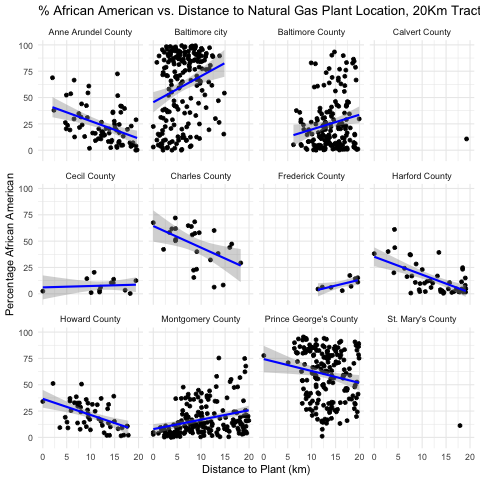

In [160]:
%%R

    ggplot(df_md_20_km) +
    aes(x=distance_to_plant, y=E_AFAM) +
    geom_point() +
    facet_wrap(~COUNTY_x) +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "% African American vs. Distance to Natural Gas Plant Location, 20Km Tracts",
            x = "Distance to Plant (km)",
            y = "Percentage African American"
          ) +
          theme_minimal()


### Explanation ###


## 3. % Hispanic and distance to plant location ##

In [37]:
%%R

model <- lm(distance_to_plant ~ E_HISP, data=df_md_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_HISP, data = df_md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2131 -0.9256  0.1921  1.1686  1.9550 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.92537    0.16661  17.558   <2e-16 ***
E_HISP       0.01754    0.01548   1.133    0.259    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.367 on 137 degrees of freedom
Multiple R-squared:  0.009284,	Adjusted R-squared:  0.002052 
F-statistic: 1.284 on 1 and 137 DF,  p-value: 0.2592



In [38]:
%%R

model <- lm(distance_to_plant ~ E_HISP, data=df_md_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_HISP, data = df_md_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3455 -1.8852  0.3379  2.0951  4.0524 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.7781     0.1680   34.38  < 2e-16 ***
E_HISP        0.0346     0.0100    3.46 0.000598 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.594 on 405 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.02871,	Adjusted R-squared:  0.02631 
F-statistic: 11.97 on 1 and 405 DF,  p-value: 0.0005983



In [39]:
%%R

model <- lm(distance_to_plant ~ E_HISP, data=df_md_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_HISP, data = df_md_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0818  -3.5797   0.0116   3.9588   9.0595 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.79675    0.20959  51.514   <2e-16 ***
E_HISP       0.01738    0.01158   1.502    0.133    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.986 on 960 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.002344,	Adjusted R-squared:  0.001304 
F-statistic: 2.255 on 1 and 960 DF,  p-value: 0.1335



In [40]:
%%R

model <- lm(distance_to_plant ~ E_UNEMP, data=df_md_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_UNEMP, data = df_md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1278 -0.8559  0.1704  1.2144  2.0016 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.83511    0.16425  17.261   <2e-16 ***
E_UNEMP      0.03569    0.01726   2.068   0.0406 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.357 on 135 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.03069,	Adjusted R-squared:  0.02351 
F-statistic: 4.275 on 1 and 135 DF,  p-value: 0.04059



### Explanation ###


In [162]:
%%R

model <- lm(distance_to_plant ~ E_UNEMP, data=df_md_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_UNEMP, data = df_md_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2609 -1.8772  0.4343  2.2652  3.8429 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.30693    0.20388  30.935   <2e-16 ***
E_UNEMP     -0.02091    0.02443  -0.856    0.393    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.62 on 403 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.001814,	Adjusted R-squared:  -0.0006633 
F-statistic: 0.7322 on 1 and 403 DF,  p-value: 0.3927



In [161]:
%%R

model <- lm(distance_to_plant ~ E_UNEMP, data=df_md_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_UNEMP, data = df_md_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5881  -3.5855  -0.0247   3.8597  10.1835 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11.9412     0.2645  45.156  < 2e-16 ***
E_UNEMP      -0.1605     0.0367  -4.374 1.35e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.931 on 958 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.01958,	Adjusted R-squared:  0.01856 
F-statistic: 19.13 on 1 and 958 DF,  p-value: 1.352e-05



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`). 



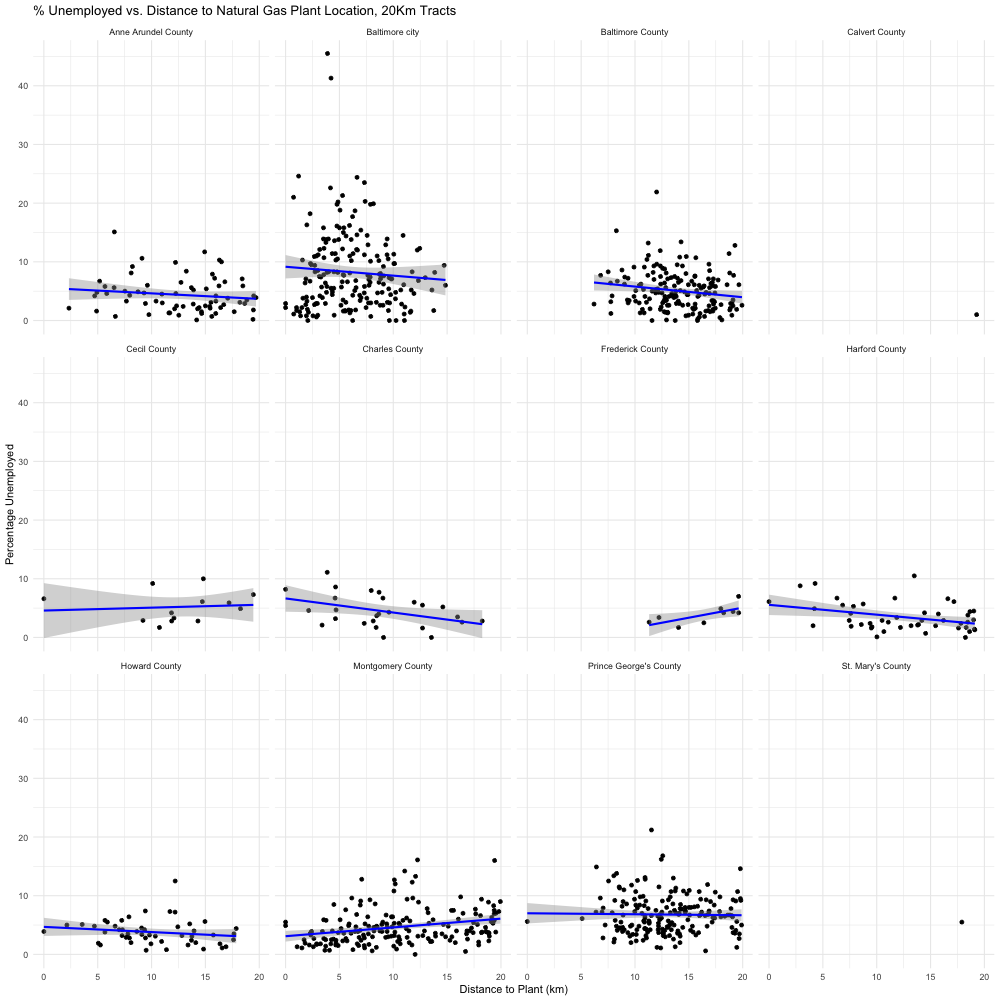

In [244]:
%%R -h 1000 -w 1000

    ggplot(df_md_20_km) +
    aes(x=distance_to_plant, y=E_UNEMP) +
    geom_point() +
    facet_wrap(~COUNTY_x)+
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "% Unemployed vs. Distance to Natural Gas Plant Location, 20Km Tracts",
            x = "Distance to Plant (km)",
            y = "Percentage Unemployed"
          ) +
          theme_minimal()

### Explanation ###


## 4. % No High School diploma and distance to plant location ##

In [165]:
%%R

model <- lm(distance_to_plant ~ E_NOHSDP, data=df_md_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_NOHSDP, data = df_md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1405 -0.9151  0.1601  1.1862  2.0201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.88577    0.16576  17.409   <2e-16 ***
E_NOHSDP     0.01757    0.01192   1.474    0.143    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.363 on 137 degrees of freedom
Multiple R-squared:  0.01561,	Adjusted R-squared:  0.00843 
F-statistic: 2.173 on 1 and 137 DF,  p-value: 0.1427



In [166]:
%%R

model <- lm(distance_to_plant ~ E_NOHSDP, data=df_md_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_NOHSDP, data = df_md_10_km)

Residuals:
   Min     1Q Median     3Q    Max 
-6.202 -1.935  0.433  2.282  3.910 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.98908    0.20285  29.525   <2e-16 ***
E_NOHSDP     0.01471    0.01400   1.051    0.294    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.628 on 405 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.002718,	Adjusted R-squared:  0.0002555 
F-statistic: 1.104 on 1 and 405 DF,  p-value: 0.2941



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1 row containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: 
R[write to console]: In qt((1 - level)/2, df) :
R[write to console]:  NaNs produced

R[write to console]: 3: Removed 1 row containing missing values or values outside the scale range
(`geom_point()`). 

R[write to console]: 4: 
R[write to console]: In max(ids, na.rm = TRUE) :
R[write to console]: 
 
R[write to console]:  no non-missing arguments to max; returning -Inf



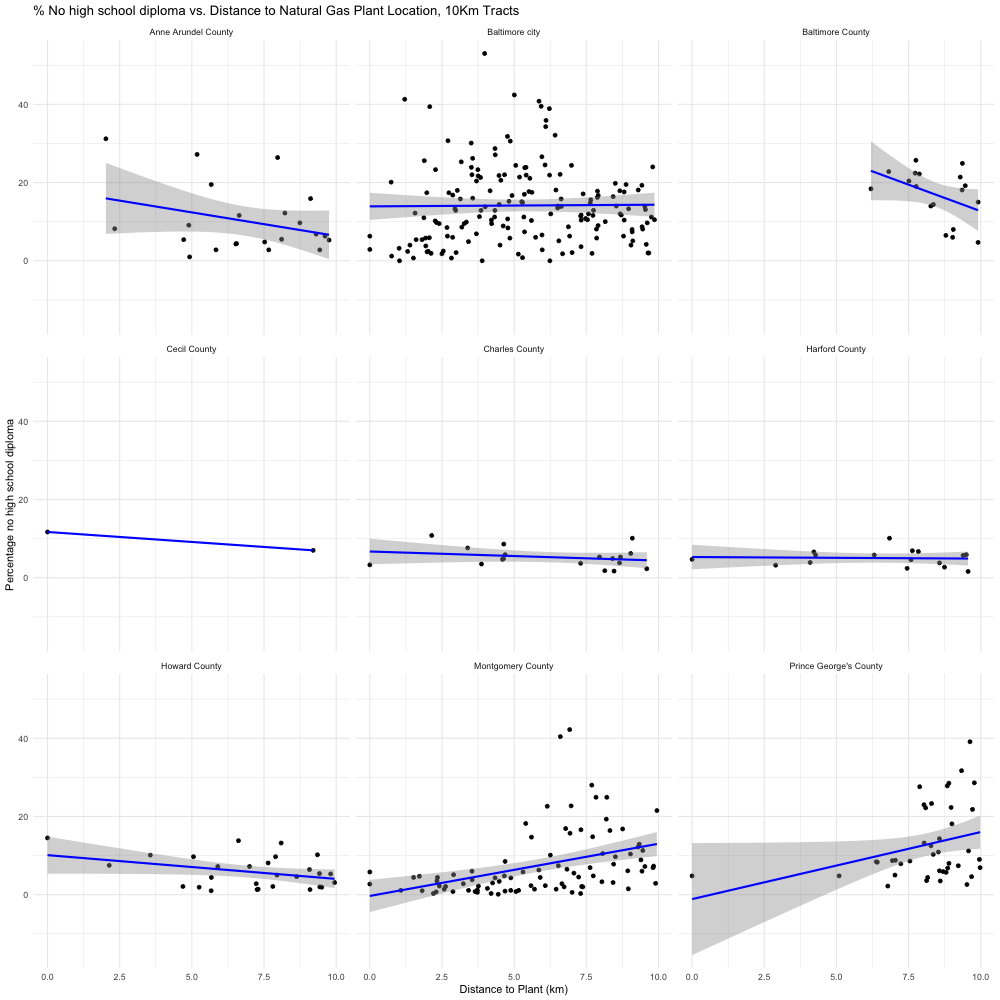

In [168]:
%%R -h 1000 -w 1000

    ggplot(df_md_10_km) +
    aes(x=distance_to_plant, y=E_NOHSDP) +
    geom_point() +
    facet_wrap(~COUNTY_x) +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "% No high school diploma vs. Distance to Natural Gas Plant Location, 10Km Tracts",
            x = "Distance to Plant (km)",
            y = "Percentage no high school diploma"
          ) +
          theme_minimal()

### Explanation ###


In [169]:
%%R

model <- lm(distance_to_plant ~ E_NOHSDP, data=df_md_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_NOHSDP, data = df_md_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.3855  -3.5853   0.0654   3.9318   9.5280 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.52280    0.24405  47.215   <2e-16 ***
E_NOHSDP    -0.05085    0.01786  -2.847   0.0045 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.97 on 960 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.008374,	Adjusted R-squared:  0.007341 
F-statistic: 8.107 on 1 and 960 DF,  p-value: 0.004505



### Explanation ###


## 5. % Uninsured and distance to plant location ##

In [171]:
%%R

model <- lm(distance_to_plant ~ E_UNINSUR, data=df_md_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_UNINSUR, data = df_md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5971 -0.8097  0.1430  1.0567  2.0414 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.68283    0.17137  15.656  < 2e-16 ***
E_UNINSUR    0.08465    0.02760   3.067  0.00261 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.332 on 135 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.06515,	Adjusted R-squared:  0.05822 
F-statistic: 9.408 on 1 and 135 DF,  p-value: 0.002612



In [177]:
%%R

model <- lm(distance_to_plant ~ E_UNINSUR, data=df_md_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_UNINSUR, data = df_md_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6635 -2.0022  0.3912  2.1218  4.2648 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.54529    0.19393  28.594  < 2e-16 ***
E_UNINSUR    0.10354    0.02412   4.292 2.22e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.565 on 403 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.04371,	Adjusted R-squared:  0.04134 
F-statistic: 18.42 on 1 and 403 DF,  p-value: 2.221e-05



In [179]:
%%R

model <- lm(distance_to_plant ~ E_UNINSUR, data=df_md_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_UNINSUR, data = df_md_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.1753  -3.5689   0.0146   3.8750   9.0120 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.77953    0.22822  47.233   <2e-16 ***
E_UNINSUR    0.03665    0.02499   1.466    0.143    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.974 on 958 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.002239,	Adjusted R-squared:  0.001198 
F-statistic:  2.15 on 1 and 958 DF,  p-value: 0.1429



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`). 



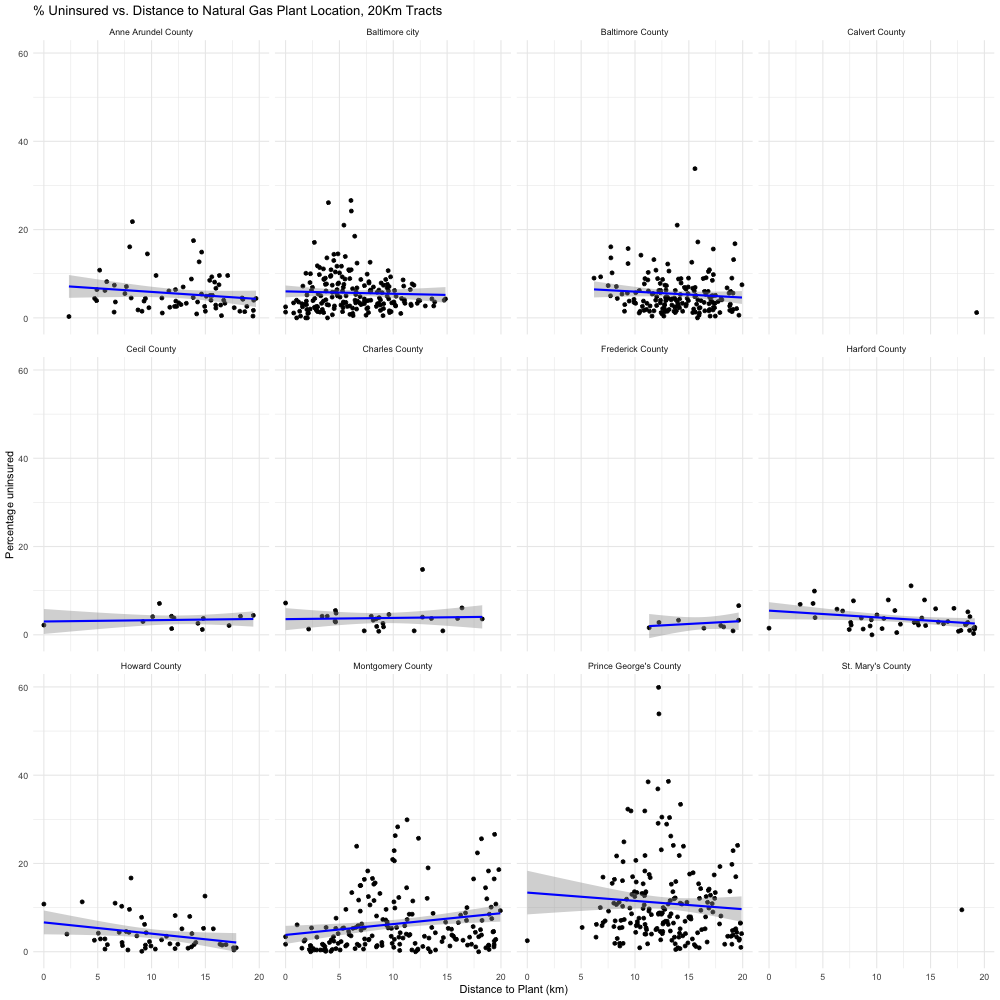

In [181]:
%%R -h 1000 -w 1000

    ggplot(df_md_20_km) +
    aes(x=distance_to_plant, y=E_UNINSUR) +
    geom_point() +
    facet_wrap(~COUNTY_x) +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "% Uninsured vs. Distance to Natural Gas Plant Location, 20Km Tracts",
            x = "Distance to Plant (km)",
            y = "Percentage uninsured"
          ) +
          theme_minimal()

### Explanation ###


## 6. % Renters and distance to plant location ##

In [182]:
%%R

model <- lm(distance_to_plant ~ E_RENTER, data=df_md_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_RENTER, data = df_md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0768 -0.9333  0.2670  1.1763  1.8506 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.077e+00  2.525e-01  12.184   <2e-16 ***
E_RENTER    -2.628e-05  4.545e-03  -0.006    0.995    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.378 on 135 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  2.477e-07,	Adjusted R-squared:  -0.007407 
F-statistic: 3.344e-05 on 1 and 135 DF,  p-value: 0.9954



In [183]:
%%R

model <- lm(distance_to_plant ~ E_RENTER, data=df_md_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_RENTER, data = df_md_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9397 -1.8799  0.3827  2.1325  4.3736 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.059867   0.248352  28.427  < 2e-16 ***
E_RENTER    -0.020720   0.004976  -4.164 3.83e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.568 on 403 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.04125,	Adjusted R-squared:  0.03887 
F-statistic: 17.34 on 1 and 403 DF,  p-value: 3.828e-05



In [62]:
%%R

model <- lm(distance_to_plant ~ E_RENTER, data=df_md_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_RENTER, data = df_md_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.6079  -3.6167   0.1679   3.7862  11.5089 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.908119   0.268987  47.988   <2e-16 ***
E_RENTER    -0.051762   0.006021  -8.597   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.798 on 958 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.07162,	Adjusted R-squared:  0.07065 
F-statistic:  73.9 on 1 and 958 DF,  p-value: < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`). 



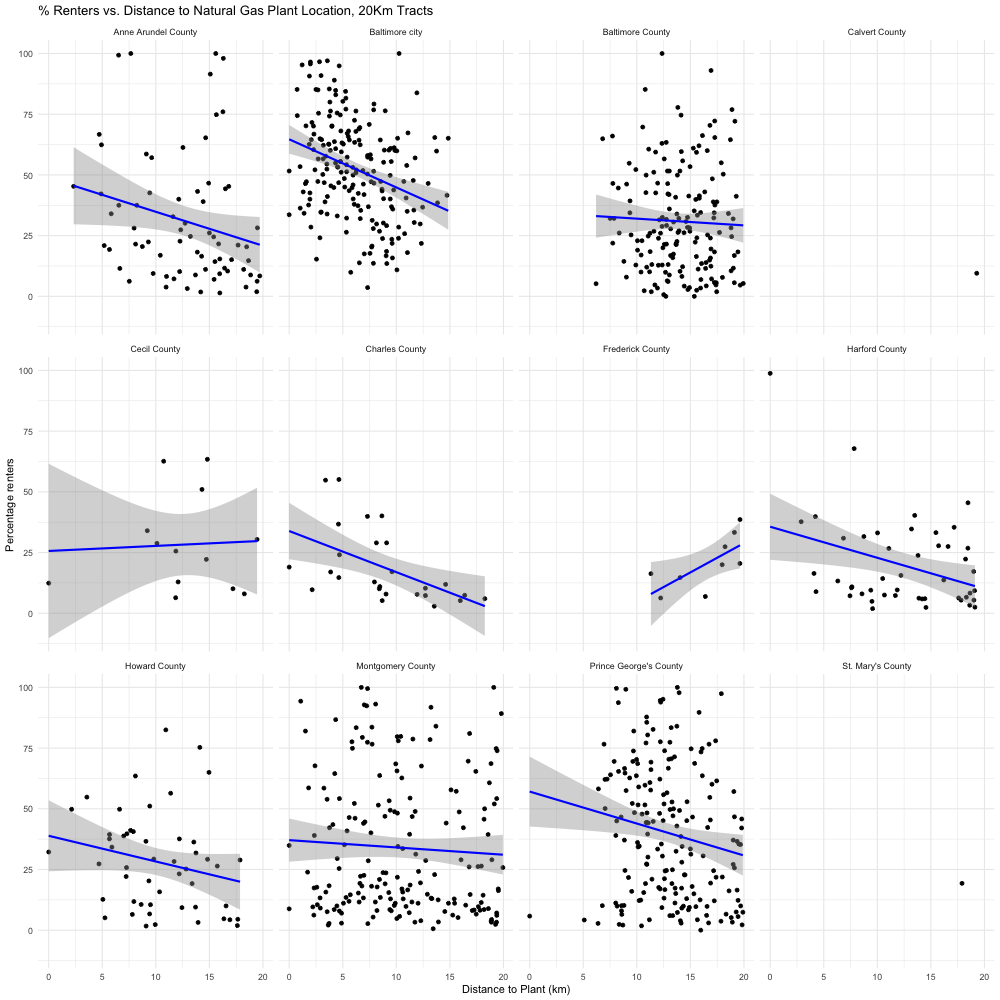

In [187]:
%%R -h 1000 -w 1000

    ggplot(df_md_20_km) +
    aes(x=distance_to_plant, y=E_RENTER) +
    geom_point() +
    facet_wrap(~COUNTY_x) +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "% Renters vs. Distance to Natural Gas Plant Location, 20Km Tracts",
            x = "Distance to Plant (km)",
            y = "Percentage renters"
          ) +
          theme_minimal()

### Explanation ###


## 7. % of People who Speak English 'Less Than Well' and Plant Locations

In [188]:
%%R

model <- lm(distance_to_plant ~ E_LIMENG, data=df_md_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_LIMENG, data = df_md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2930 -0.9123  0.1317  1.2220  1.9784 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.94757    0.14496   20.33   <2e-16 ***
E_LIMENG     0.06169    0.04746    1.30    0.196    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.365 on 137 degrees of freedom
Multiple R-squared:  0.01218,	Adjusted R-squared:  0.00497 
F-statistic: 1.689 on 1 and 137 DF,  p-value: 0.1959



In [66]:
%%R

model <- lm(distance_to_plant ~ E_LIMENG, data=df_md_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_LIMENG, data = df_md_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4539 -1.8914  0.2251  2.1038  4.0569 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.76295    0.15599  36.945  < 2e-16 ***
E_LIMENG     0.12339    0.02845   4.337 1.83e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.573 on 405 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.04437,	Adjusted R-squared:  0.04201 
F-statistic: 18.81 on 1 and 405 DF,  p-value: 1.829e-05



In [67]:
%%R

model <- lm(distance_to_plant ~ E_LIMENG, data=df_md_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_LIMENG, data = df_md_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.1160  -3.6509   0.0376   3.9766   9.1170 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.73392    0.18856  56.926  < 2e-16 ***
E_LIMENG     0.06824    0.02557   2.669  0.00775 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.973 on 960 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.007364,	Adjusted R-squared:  0.00633 
F-statistic: 7.121 on 1 and 960 DF,  p-value: 0.007745



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1 row containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 1 row containing missing values or values outside the scale range
(`geom_point()`). 



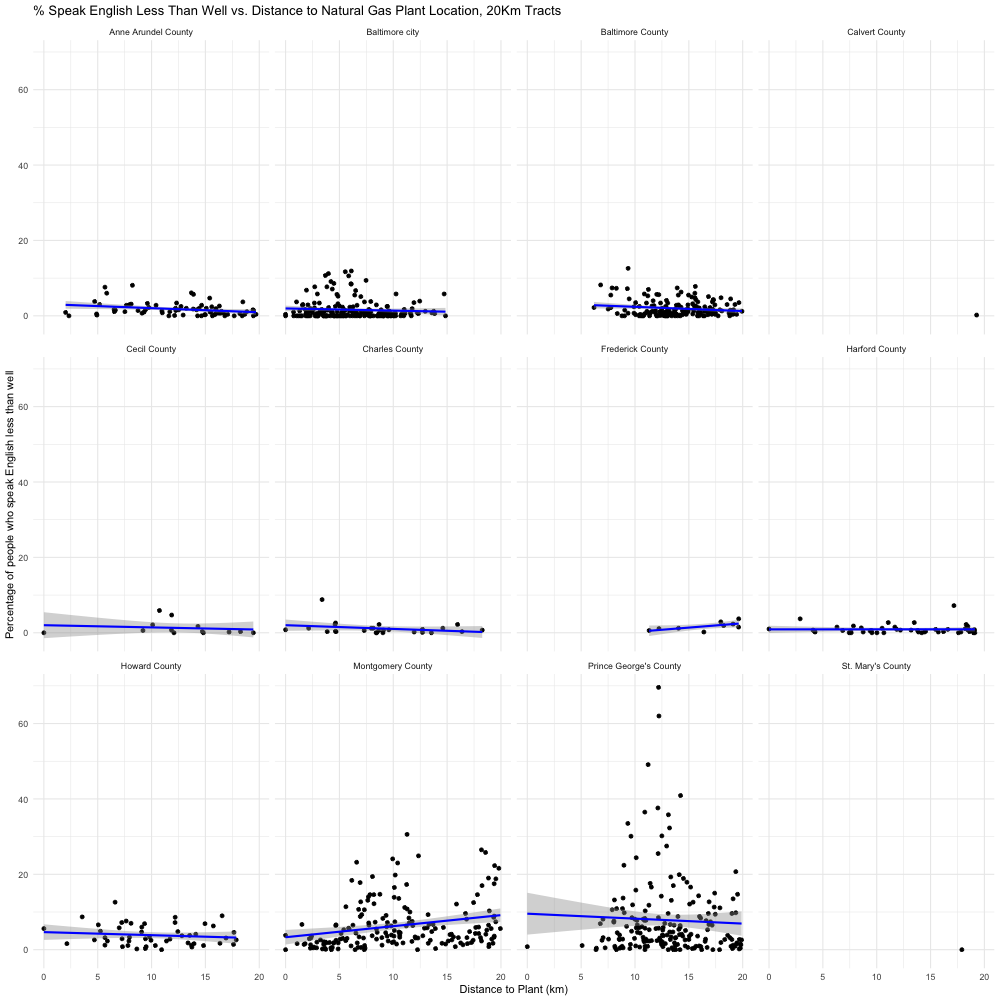

In [190]:
%%R -h 1000 -w 1000

    ggplot(df_md_20_km) +
    aes(x=distance_to_plant, y=E_LIMENG) +
    geom_point() +
    facet_wrap(~COUNTY_x) +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "% Speak English Less Than Well vs. Distance to Natural Gas Plant Location, 20Km Tracts",
            x = "Distance to Plant (km)",
            y = "Percentage of people who speak English less than well"
          ) +
          theme_minimal()

### Explanation ###


## 8. Age 17 and younger vs. plant location

In [191]:
%%R

model <- lm(distance_to_plant ~ EPL_AGE17, data=df_md_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ EPL_AGE17, data = df_md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5947 -0.8523  0.1971  1.0680  2.1866 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.5740     0.1935  13.299   <2e-16 ***
EPL_AGE17     1.0679     0.3452   3.094   0.0024 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.328 on 137 degrees of freedom
Multiple R-squared:  0.0653,	Adjusted R-squared:  0.05848 
F-statistic: 9.572 on 1 and 137 DF,  p-value: 0.002396



In [192]:
%%R

model <- lm(distance_to_plant ~ EPL_AGE17, data=df_md_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ EPL_AGE17, data = df_md_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7079 -2.1300  0.3872  2.1611  4.2573 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.5824     0.2494  22.379  < 2e-16 ***
EPL_AGE17     1.1774     0.4406   2.672  0.00783 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.609 on 405 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.01733,	Adjusted R-squared:  0.0149 
F-statistic: 7.142 on 1 and 405 DF,  p-value: 0.007835



In [193]:
%%R

model <- lm(distance_to_plant ~ EPL_AGE17, data=df_md_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ EPL_AGE17, data = df_md_20_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.917  -3.554   0.100   3.880   9.374 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.9490     0.3356  29.648  < 2e-16 ***
EPL_AGE17     2.0591     0.5787   3.558 0.000392 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.959 on 960 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.01302,	Adjusted R-squared:  0.01199 
F-statistic: 12.66 on 1 and 960 DF,  p-value: 0.0003917



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1 row containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 1 row containing missing values or values outside the scale range
(`geom_point()`). 



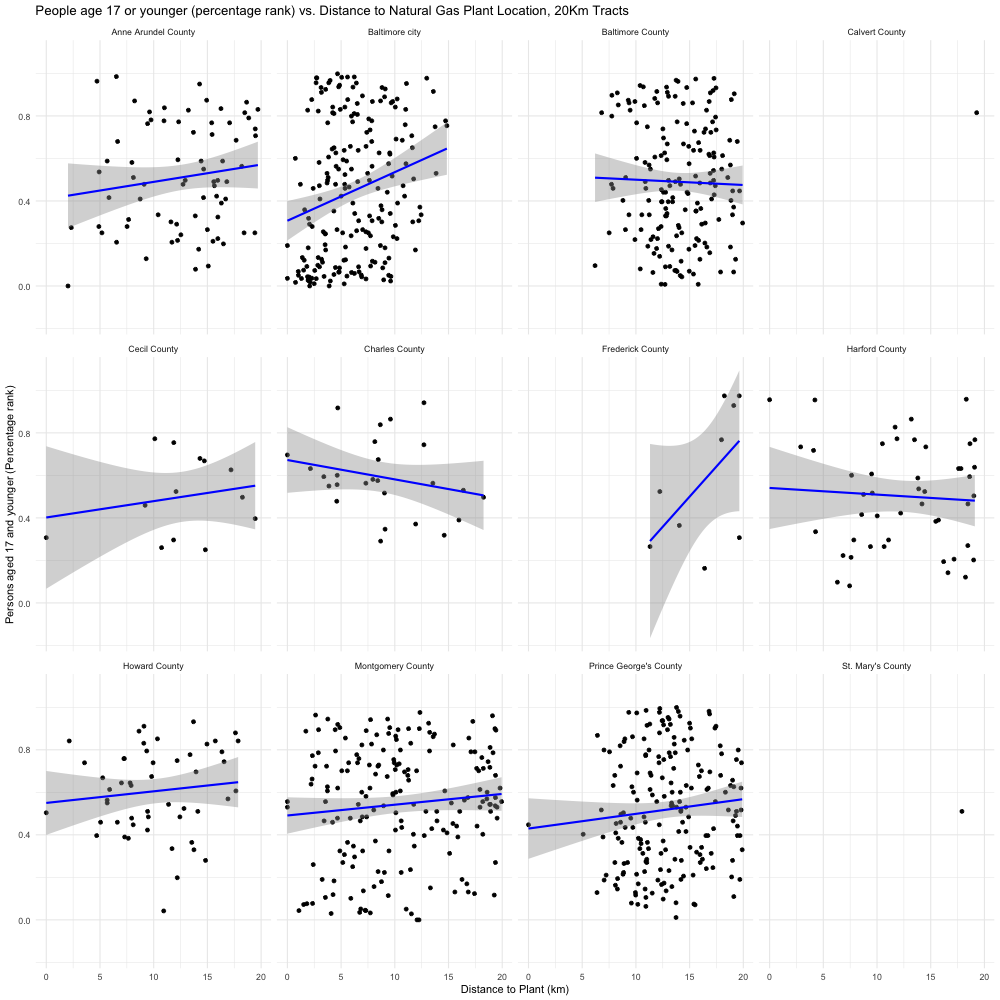

In [243]:
%%R -h 1000 -w 1000

    ggplot(df_md_20_km) +
    aes(x=distance_to_plant, y=EPL_AGE17) +
    geom_point() +
    facet_wrap(~COUNTY_x) +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "People age 17 or younger (percentage rank) vs. Distance to Natural Gas Plant Location, 20Km Tracts",
            x = "Distance to Plant (km)",
            y = "Persons aged 17 and younger (Percentage rank)"
          ) +
          theme_minimal()

## 8. Age 65 and older vs. plant location

In [195]:
%%R

model <- lm(distance_to_plant ~ EPL_AGE65, data=df_md_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ EPL_AGE65, data = df_md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2443 -0.8932  0.2226  1.1831  2.0267 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.8833     0.1899  15.186   <2e-16 ***
EPL_AGE65     0.5160     0.4370   1.181     0.24    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.367 on 137 degrees of freedom
Multiple R-squared:  0.01008,	Adjusted R-squared:  0.00285 
F-statistic: 1.394 on 1 and 137 DF,  p-value: 0.2397



In [75]:
%%R

model <- lm(distance_to_plant ~ EPL_AGE65, data=df_md_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ EPL_AGE65, data = df_md_10_km)

Residuals:
   Min     1Q Median     3Q    Max 
-6.701 -1.900  0.307  2.238  4.217 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.4094     0.2347  23.046  < 2e-16 ***
EPL_AGE65     1.8456     0.4883   3.779 0.000181 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.587 on 405 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.03407,	Adjusted R-squared:  0.03168 
F-statistic: 14.28 on 1 and 405 DF,  p-value: 0.0001808



In [76]:
%%R

model <- lm(distance_to_plant ~ EPL_AGE65, data=df_md_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ EPL_AGE65, data = df_md_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.6425  -3.6081   0.0762   3.6856   9.7022 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.9196     0.3042  32.605  < 2e-16 ***
EPL_AGE65     2.4627     0.5913   4.165 3.39e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.947 on 960 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.01775,	Adjusted R-squared:  0.01673 
F-statistic: 17.35 on 1 and 960 DF,  p-value: 3.391e-05



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1 row containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 1 row containing missing values or values outside the scale range
(`geom_point()`). 



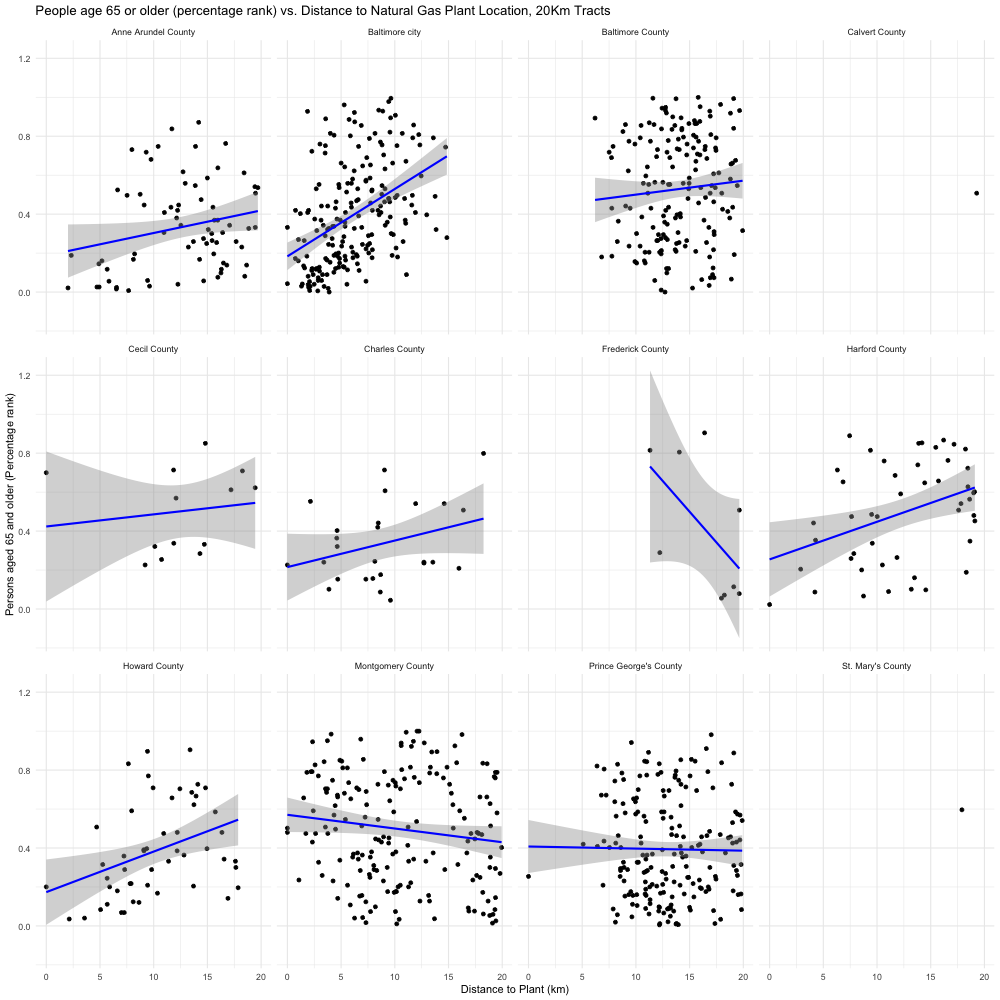

In [197]:
%%R -h 1000 -w 1000

    ggplot(df_md_20_km) +
    aes(x=distance_to_plant, y=EPL_AGE65) +
    geom_point() +
    facet_wrap(~COUNTY_x) +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "People age 65 or older (percentage rank) vs. Distance to Natural Gas Plant Location, 20Km Tracts",
            x = "Distance to Plant (km)",
            y = "Persons aged 65 and older (Percentage rank)"
          ) +
          theme_minimal()

### Explanation ###


## 9. Distance to impaired watershed and distance to plant location ##

In [199]:
%%R

model <- lm(distance_to_plant ~ E_IMPWTR, data=df_md_5_km)

summary(model)


Call:
lm(formula = distance_to_plant ~ E_IMPWTR, data = df_md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1207 -0.9293  0.2140  1.1800  1.8704 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.12087    0.51713   6.035  1.4e-08 ***
E_IMPWTR    -0.06526    0.54836  -0.119    0.905    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.373 on 137 degrees of freedom
Multiple R-squared:  0.0001034,	Adjusted R-squared:  -0.007195 
F-statistic: 0.01416 on 1 and 137 DF,  p-value: 0.9054



In [200]:
%%R

model <- lm(distance_to_plant ~ E_IMPWTR, data=df_md_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_IMPWTR, data = df_md_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.1919 -1.9479  0.4174  2.2883  3.8615 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.6849     0.7240   7.852 3.69e-14 ***
E_IMPWTR      0.5069     0.7585   0.668    0.504    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.633 on 406 degrees of freedom
Multiple R-squared:  0.001099,	Adjusted R-squared:  -0.001361 
F-statistic: 0.4467 on 1 and 406 DF,  p-value: 0.5043



In [202]:
%%R

model <- lm(distance_to_plant ~ E_IMPWTR, data=df_md_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_IMPWTR, data = df_md_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0802  -3.6994   0.0606   3.8648   9.0814 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.5216     0.9975   9.546   <2e-16 ***
E_IMPWTR      1.5586     1.0398   1.499    0.134    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.983 on 961 degrees of freedom
Multiple R-squared:  0.002333,	Adjusted R-squared:  0.001295 
F-statistic: 2.247 on 1 and 961 DF,  p-value: 0.1342



### Explanation ###


`geom_smooth()` using formula = 'y ~ x'


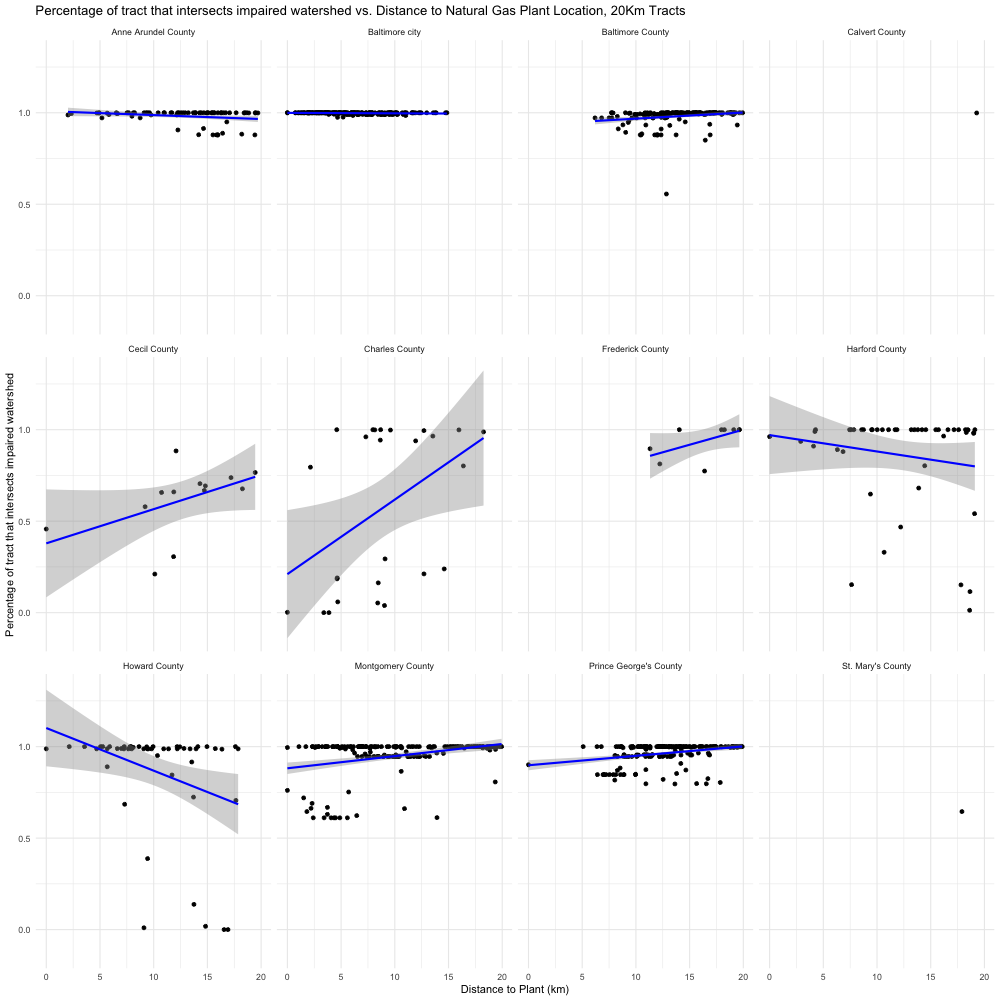

In [204]:
%%R -h 1000 -w 1000

    ggplot(df_md_20_km) +
    aes(x=distance_to_plant, y=E_IMPWTR) +
    geom_point() +
    facet_wrap(~COUNTY_x) +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "Percentage of tract that intersects impaired watershed vs. Distance to Natural Gas Plant Location, 20Km Tracts",
            x = "Distance to Plant (km)",
            y = "Percentage of tract that intersects impaired watershed"
          ) +
          theme_minimal()

### Explanation ###


## 10. % Burdened by housing costs (salary below 75,000) and distance to plant location ##

In [206]:
%%R

model <- lm(distance_to_plant ~ E_HOUBDN, data=df_md_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_HOUBDN, data = df_md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9133 -0.9254  0.2150  1.1172  2.3692 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.380230   0.251929   9.448   <2e-16 ***
E_HOUBDN    0.023800   0.007692   3.094   0.0024 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.332 on 135 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.06622,	Adjusted R-squared:  0.0593 
F-statistic: 9.573 on 1 and 135 DF,  p-value: 0.0024



In [207]:
%%R

model <- lm(distance_to_plant ~ E_HOUBDN, data=df_md_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_HOUBDN, data = df_md_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.1926 -1.9405  0.4382  2.2523  3.8243 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.210816   0.305999  20.297   <2e-16 ***
E_HOUBDN    -0.001318   0.009573  -0.138    0.891    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.623 on 403 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  4.706e-05,	Adjusted R-squared:  -0.002434 
F-statistic: 0.01897 on 1 and 403 DF,  p-value: 0.8905



In [209]:
%%R

model <- lm(distance_to_plant ~ E_HOUBDN, data=df_md_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_HOUBDN, data = df_md_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.8859  -3.5257   0.1918   3.8855  11.0297 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.80355    0.35285  36.286  < 2e-16 ***
E_HOUBDN    -0.06649    0.01174  -5.662 1.97e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.898 on 958 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.03238,	Adjusted R-squared:  0.03137 
F-statistic: 32.06 on 1 and 958 DF,  p-value: 1.974e-08



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`). 



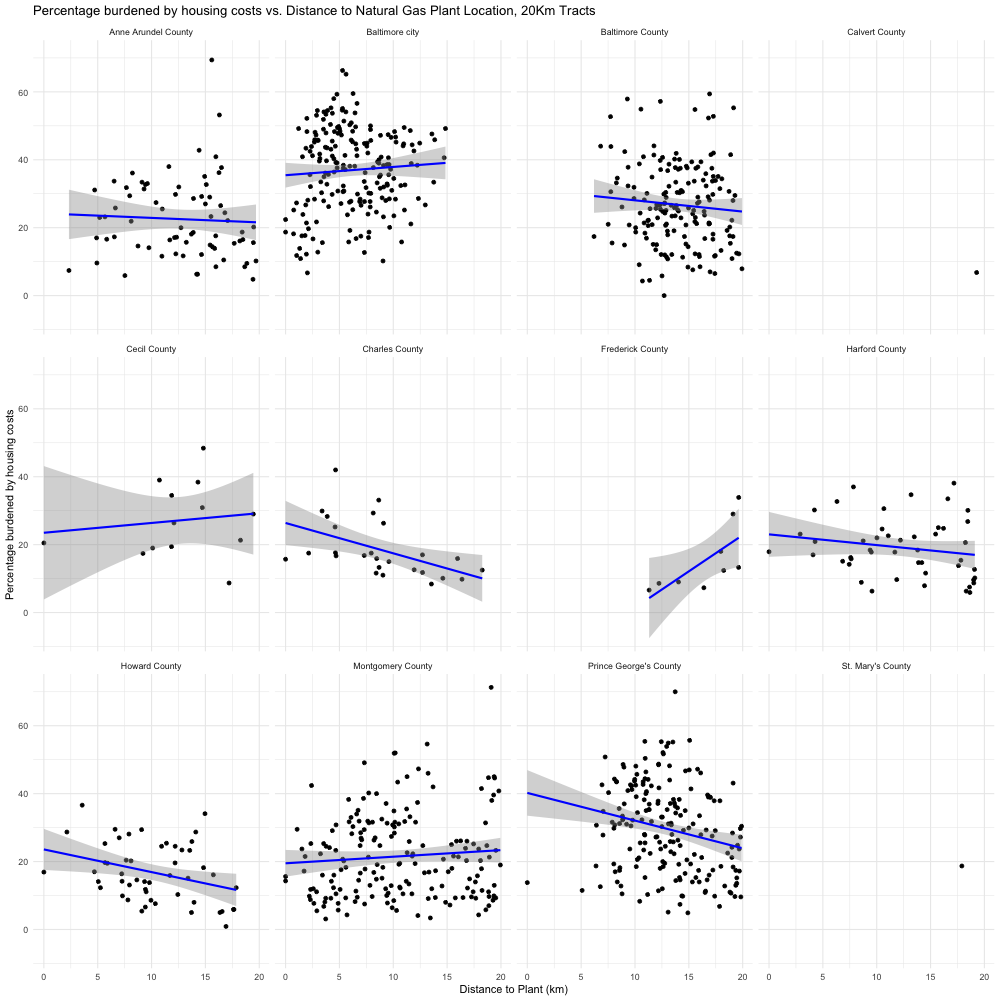

In [211]:
%%R -h 1000 -w 1000

    ggplot(df_md_20_km) +
    aes(x=distance_to_plant, y=E_HOUBDN) +
    geom_point() +
    facet_wrap(~COUNTY_x) +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "Percentage burdened by housing costs vs. Distance to Natural Gas Plant Location, 20Km Tracts",
            x = "Distance to Plant (km)",
            y = "Percentage burdened by housing costs"
          ) +
          theme_minimal()

### Explanation ###


# Multivariate linear regressions

In [212]:
%%R

model <- lm(distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + E_UNINSUR + E_NOHSDP + E_LIMENG, data=df_md_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + 
    E_UNINSUR + E_NOHSDP + E_LIMENG, data = df_md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4346 -0.7521  0.0427  1.0196  2.5148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.793323   0.260249  10.733   <2e-16 ***
E_POV200     0.020963   0.009861   2.126   0.0354 *  
E_AFAM       0.005528   0.005116   1.080   0.2820    
E_RENTER    -0.012854   0.005602  -2.294   0.0234 *  
E_UNINSUR    0.048293   0.037268   1.296   0.1973    
E_NOHSDP    -0.027527   0.020546  -1.340   0.1826    
E_LIMENG     0.045471   0.057705   0.788   0.4321    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.31 on 130 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1297,	Adjusted R-squared:  0.08952 
F-statistic: 3.229 on 6 and 130 DF,  p-value: 0.005457



In [213]:
%%R

model <- lm(distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + E_UNINSUR + E_NOHSDP + E_LIMENG, data=df_md_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + 
    E_UNINSUR + E_NOHSDP + E_LIMENG, data = df_md_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9494 -1.6367  0.1929  1.9535  4.9327 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.112982   0.267393  22.861  < 2e-16 ***
E_POV200    -0.032535   0.011070  -2.939  0.00348 ** 
E_AFAM       0.026650   0.004536   5.876 8.89e-09 ***
E_RENTER    -0.024868   0.005812  -4.279 2.36e-05 ***
E_UNINSUR    0.077554   0.035194   2.204  0.02812 *  
E_NOHSDP     0.007130   0.021148   0.337  0.73618    
E_LIMENG     0.109389   0.041572   2.631  0.00884 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.381 on 398 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.1863,	Adjusted R-squared:  0.1741 
F-statistic: 15.19 on 6 and 398 DF,  p-value: 1.099e-15



In [93]:
%%R

model <- lm(distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + E_UNINSUR + E_NOHSDP + E_LIMENG, data=df_md_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + 
    E_UNINSUR + E_NOHSDP + E_LIMENG, data = df_md_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.0717  -3.2736  -0.2126   3.7406  11.2002 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.978752   0.305976  42.418  < 2e-16 ***
E_POV200    -0.049777   0.016011  -3.109  0.00193 ** 
E_AFAM       0.003981   0.005892   0.676  0.49936    
E_RENTER    -0.041103   0.007913  -5.194 2.52e-07 ***
E_UNINSUR    0.136449   0.043820   3.114  0.00190 ** 
E_NOHSDP    -0.054486   0.031364  -1.737  0.08267 .  
E_LIMENG     0.066850   0.046369   1.442  0.14972    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.685 on 953 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.1196,	Adjusted R-squared:  0.1141 
F-statistic: 21.58 on 6 and 953 DF,  p-value: < 2.2e-16



### Explanation ###


In [214]:
%%R

model <- lm(distance_to_plant ~ E_POV200 + E_AFAM + + E_UNEMP + E_RENTER + E_UNINSUR + E_NOHSDP + E_LIMENG + E_PARK + E_AGE17 + E_AGE65 + EPL_ROAD + E_HOUBDN + E_PM + E_OZONE, data=df_md_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200 + E_AFAM + +E_UNEMP + 
    E_RENTER + E_UNINSUR + E_NOHSDP + E_LIMENG + E_PARK + E_AGE17 + 
    E_AGE65 + EPL_ROAD + E_HOUBDN + E_PM + E_OZONE, data = df_md_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.1509  -3.0367  -0.3231   3.0973  10.2936 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.996892   3.214430   3.110 0.001927 ** 
E_POV200     -0.073961   0.019614  -3.771 0.000173 ***
E_AFAM       -0.002217   0.006238  -0.355 0.722369    
E_UNEMP      -0.043330   0.040251  -1.077 0.281977    
E_RENTER     -0.042801   0.008949  -4.783 2.00e-06 ***
E_UNINSUR     0.112055   0.041583   2.695 0.007170 ** 
E_NOHSDP     -0.023017   0.030228  -0.761 0.446574    
E_LIMENG      0.063090   0.046863   1.346 0.178536    
E_PARK        0.015966   0.031678   0.504 0.614363    
E_AGE17       0.084843   0.024569   3.453 0.000579 ***
E_AGE65       0.061120   0.020586   2.969 0.003063 ** 
EPL_ROAD

### Explanation ###


In [215]:
%%R

model <- lm(distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + E_LIMENG + E_AGE17 + EPL_ROAD + E_HOUBDN + E_PM + E_OZONE, data=df_md_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + 
    E_LIMENG + E_AGE17 + EPL_ROAD + E_HOUBDN + E_PM + E_OZONE, 
    data = df_md_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.6735  -3.0826  -0.2508   3.2146  10.8526 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13.069194   0.807424  16.186  < 2e-16 ***
E_POV200     -0.082527   0.016619  -4.966 8.11e-07 ***
E_AFAM       -0.004085   0.005885  -0.694  0.48771    
E_RENTER     -0.049552   0.008404  -5.896 5.17e-09 ***
E_LIMENG      0.120671   0.026748   4.511 7.24e-06 ***
E_AGE17       0.063742   0.022819   2.793  0.00532 ** 
EPL_ROAD     -6.850906   1.120620  -6.113 1.42e-09 ***
E_HOUBDN      0.115325   0.021970   5.249 1.89e-07 ***
E_PM        -43.913049   4.849897  -9.054  < 2e-16 ***
E_OZONE       2.723647   0.508604   5.355 1.07e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.371 on 950 degrees of

### Explanation ###


In [96]:
%%R

model <- lm(distance_to_plant ~ E_PM + E_OZONE, data=df_md_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_PM + E_OZONE, data = df_md_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.8111  -3.6863  -0.1562   3.6112  11.1914 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11.1153     0.2763  40.226  < 2e-16 ***
E_PM        -50.4008     5.0210 -10.038  < 2e-16 ***
E_OZONE       1.5472     0.5031   3.075  0.00216 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.722 on 960 degrees of freedom
Multiple R-squared:  0.1049,	Adjusted R-squared:  0.1031 
F-statistic: 56.27 on 2 and 960 DF,  p-value: < 2.2e-16



### Explanation ###


In [97]:
%%R

model <- lm(distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + E_LIMENG + E_AGE17 + EPL_ROAD + E_HOUBDN + E_PM + E_OZONE, data=df_md_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + 
    E_LIMENG + E_AGE17 + EPL_ROAD + E_HOUBDN + E_PM + E_OZONE, 
    data = df_md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6725 -0.8317  0.0817  0.8615  3.2253 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.319166   0.776406   0.411 0.681706    
E_POV200      0.010126   0.011074   0.914 0.362265    
E_AFAM        0.002779   0.005198   0.535 0.593904    
E_RENTER     -0.015615   0.005814  -2.686 0.008208 ** 
E_LIMENG      0.030553   0.047552   0.643 0.521696    
E_AGE17       0.013228   0.016064   0.823 0.411784    
EPL_ROAD      3.865028   1.138633   3.394 0.000918 ***
E_HOUBDN      0.032799   0.016372   2.003 0.047259 *  
E_PM        -11.458318   3.741426  -3.063 0.002680 ** 
E_OZONE       0.237430   0.435561   0.545 0.586632    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.205 on 127 degrees of freedom
  

### Explanation ###


In [98]:
%%R

model <- lm(distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + E_LIMENG + E_AGE17 + EPL_ROAD + E_HOUBDN + E_PM + E_OZONE, data=df_md_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + 
    E_LIMENG + E_AGE17 + EPL_ROAD + E_HOUBDN + E_PM + E_OZONE, 
    data = df_md_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5537 -1.5149  0.0933  1.6539  4.7325 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.196363   0.751875   6.911 1.94e-11 ***
E_POV200     -0.045749   0.011787  -3.881 0.000122 ***
E_AFAM        0.017520   0.004481   3.910 0.000109 ***
E_RENTER     -0.036381   0.005949  -6.115 2.32e-09 ***
E_LIMENG      0.164686   0.027262   6.041 3.54e-09 ***
E_AGE17       0.019412   0.016686   1.163 0.245376    
EPL_ROAD     -1.003681   1.060453  -0.946 0.344490    
E_HOUBDN      0.080367   0.016962   4.738 3.02e-06 ***
E_PM        -26.646242   3.302111  -8.069 8.57e-15 ***
E_OZONE       2.029870   0.408851   4.965 1.02e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.167 on 395 degrees of freedom
 

In [99]:
%%R

model <- lm(distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + E_LIMENG + E_AGE17 + EPL_ROAD + E_HOUBDN + E_PM + E_OZONE, data=df_md_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + 
    E_LIMENG + E_AGE17 + EPL_ROAD + E_HOUBDN + E_PM + E_OZONE, 
    data = df_md_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.6735  -3.0826  -0.2508   3.2146  10.8526 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13.069194   0.807424  16.186  < 2e-16 ***
E_POV200     -0.082527   0.016619  -4.966 8.11e-07 ***
E_AFAM       -0.004085   0.005885  -0.694  0.48771    
E_RENTER     -0.049552   0.008404  -5.896 5.17e-09 ***
E_LIMENG      0.120671   0.026748   4.511 7.24e-06 ***
E_AGE17       0.063742   0.022819   2.793  0.00532 ** 
EPL_ROAD     -6.850906   1.120620  -6.113 1.42e-09 ***
E_HOUBDN      0.115325   0.021970   5.249 1.89e-07 ***
E_PM        -43.913049   4.849897  -9.054  < 2e-16 ***
E_OZONE       2.723647   0.508604   5.355 1.07e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.371 on 950 degrees of

### Explanation ###


In [100]:
%%R

sum(complete.cases(df_md_20_km[, c("E_POV200", "E_AFAM", "E_RENTER", "E_LIMENG", 
                                "E_AGE17", "EPL_ROAD", "E_HOUBDN", "E_PM", "E_OZONE")]))
nrow(df_md_20_km)  # Total rows for comparison

colSums(is.na(df_md_20_km[, c("E_POV200", "E_AFAM", "E_RENTER", "E_LIMENG", 
                           "E_AGE17", "EPL_ROAD", "E_HOUBDN", "E_PM", "E_OZONE")]))


E_POV200   E_AFAM E_RENTER E_LIMENG  E_AGE17 EPL_ROAD E_HOUBDN     E_PM 
       3        1        3        1        1        0        3        0 
 E_OZONE 
       0 


In [101]:
%%R
# Count how many predictions are made
complete_rows <- complete.cases(df_md_20_km[, c("E_POV200", "E_AFAM", "E_RENTER", 
                                             "E_LIMENG", "E_AGE17", "EPL_ROAD", 
                                             "E_HOUBDN", "E_PM", "E_OZONE")])
sum(complete_rows)

# Assign predictions
df_md_20_km$predicted_distance_to_plant <- NA
df_md_20_km$predicted_distance_to_plant[complete_rows] <- predict(model, newdata = df_md_20_km[complete_rows, ])

# View sample
df_md_20_km %>% 
  select(GEOID, E_POV200, predicted_distance_to_plant) %>% 
  head(10)

         GEOID E_POV200 predicted_distance_to_plant
1  24003702205   8.2377                   13.122669
2  24003702208   9.2529                   14.090487
3  24003702209   4.8921                   12.312868
4  24003730101   7.1901                    9.939844
5  24003730102  10.4414                    8.483917
6  24003730204  12.6724                   10.392405
7  24003730205  40.5841                    8.929327
8  24003730206  29.3809                    8.427892
9  24003730300  23.5324                   10.374321
10 24003730401  19.9290                   12.804847


# Residuals analysis 

In [102]:
%%R

# Create a vector of NA values for predictions
df_md_20_km$predicted_distance_to_plant <- NA

# Identify complete cases
complete_rows <- complete.cases(df_md_20_km[, c("E_POV200", "E_AFAM", "E_RENTER", 
                                             "E_LIMENG", "E_AGE17", "EPL_ROAD", 
                                             "E_HOUBDN", "E_PM", "E_OZONE")])

# Assign predictions only to complete rows
df_md_20_km$predicted_distance_to_plant[complete_rows] <- predict(model, newdata = df_md_20_km[complete_rows, ])

# View all relevant columns
df_md_20_km %>% 
  select(GEOID, Band, E_POV200, E_AFAM, E_RENTER, E_LIMENG, E_AGE17, 
         EPL_ROAD, E_HOUBDN, E_PM, E_OZONE, predicted_distance_to_plant) %>% 
  head(10)

         GEOID Band E_POV200 E_AFAM E_RENTER E_LIMENG E_AGE17 EPL_ROAD E_HOUBDN
1  24003702205    4   8.2377   28.9     28.2      1.4    25.0   0.5231     20.2
2  24003702208    4   9.2529   22.9     20.4      3.7    27.3   0.4658     16.5
3  24003702209    4   4.8921    4.6     14.7      0.4    28.7   0.6136      8.5
4  24003730101    4   7.1901    2.4      1.8      1.6    15.5   0.2641      6.3
5  24003730102    4  10.4414   26.5     22.7      1.4    23.1   0.4401     12.3
6  24003730204    4  12.6724   35.6     11.1      0.0    20.3   0.4539     12.1
7  24003730205    4  40.5841   21.7     91.5      2.0    12.4   0.6136     32.7
8  24003730206    4  29.3809   20.3     43.2      5.7    11.5   0.6126     28.6
9  24003730300    4  23.5324    8.3      8.8      6.1    25.3   0.6136     18.1
10 24003730401    4  19.9290   16.2     18.2      1.8    18.9   0.6136     18.6
    E_PM E_OZONE predicted_distance_to_plant
1  0.000   0.639                   13.122669
2  0.000   0.731              

In [216]:
%%R

# Save the full dataframe with residuals to a CSV file
write.csv(df_md_20_km, "md_existing_plants_residuals.csv", row.names = FALSE)

In [217]:
df = pd.read_csv('md_existing_plants_residuals.csv')

In [218]:
df.sort_values(by='residuals',ascending=False).head(30)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY_x,StateDesc,STATEABBR,LOCATION,...,distance_to_plant,num_energy_sources,plant_names,within_1_km,within_5_km,within_10_km,within_20_km,natural_gas,predicted_distance_to_plant,residuals
127,24,5,411303,140000US24005411303,24005411303,24005411303,Baltimore County,Maryland,MD,Census Tract 4113.03; Baltimore County; Maryland,...,18.992068,0,NaN,0,0,0,1,False,8.139456,10.852612
402,24,31,700724,140000US24031700724,24031700724,24031700724,Montgomery County,Maryland,MD,Census Tract 7007.24; Montgomery County; Maryland,...,19.799832,0,NaN,0,0,0,1,False,9.521811,10.278021
416,24,31,700839,140000US24031700839,24031700839,24031700839,Montgomery County,Maryland,MD,Census Tract 7008.39; Montgomery County; Maryland,...,17.417898,0,NaN,0,0,0,1,False,7.472668,9.945230
408,24,31,700730,140000US24031700730,24031700730,24031700730,Montgomery County,Maryland,MD,Census Tract 7007.30; Montgomery County; Maryland,...,19.942023,0,NaN,0,0,0,1,False,10.074575,9.867448
129,24,5,411307,140000US24005411307,24005411307,24005411307,Baltimore County,Maryland,MD,Census Tract 4113.07; Baltimore County; Maryland,...,18.066066,0,NaN,0,0,0,1,False,8.548236,9.517830
692,24,33,803513,140000US24033803513,24033803513,24033803513,Prince George's County,Maryland,MD,Census Tract 8035.13; Prince George's County; ...,...,19.781159,0,NaN,0,0,0,1,False,10.409186,9.371973
191,24,5,451300,140000US24005451300,24005451300,24005451300,Baltimore County,Maryland,MD,Census Tract 4513; Baltimore County; Maryland,...,17.046783,0,NaN,0,0,0,1,False,7.697653,9.349130
691,24,33,803512,140000US24033803512,24033803512,24033803512,Prince George's County,Maryland,MD,Census Tract 8035.12; Prince George's County; ...,...,19.675373,0,NaN,0,0,0,1,False,10.351883,9.323490
134,24,5,411408,140000US24005411408,24005411408,24005411408,Baltimore County,Maryland,MD,Census Tract 4114.08; Baltimore County; Maryland,...,16.574152,0,NaN,0,0,0,1,False,7.325140,9.249012
193,24,5,451402,140000US24005451402,24005451402,24005451402,Baltimore County,Maryland,MD,Census Tract 4514.02; Baltimore County; Maryland,...,16.821930,0,NaN,0,0,0,1,False,7.604356,9.217574


In [219]:
df.sort_values(by='residuals').head(30)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY_x,StateDesc,STATEABBR,LOCATION,...,distance_to_plant,num_energy_sources,plant_names,within_1_km,within_5_km,within_10_km,within_20_km,natural_gas,predicted_distance_to_plant,residuals
392,24,31,700500,140000US24031700500,24031700500,24031700500,Montgomery County,Maryland,MD,Census Tract 7005; Montgomery County; Maryland,...,0.000000,4,"Dickerson Power, Montgomery County Resource Re...",1,1,1,1,True,14.673486,-14.673486
269,24,17,850904,140000US24017850904,24017850904,24017850904,Charles County,Maryland,MD,Census Tract 8509.04; Charles County; Maryland,...,0.000000,4,"CPV St Charles Energy Center, Rockfish Solar LLC",1,1,1,1,True,13.556933,-13.556933
608,24,33,801003,140000US24033801003,24033801003,24033801003,Prince George's County,Maryland,MD,Census Tract 8010.03; Prince George's County; ...,...,0.000000,4,"Brandywine Power Facility, Keys Energy Center",1,1,1,1,True,12.818512,-12.818512
338,24,25,306500,140000US24025306500,24025306500,24025306500,Harford County,Maryland,MD,Census Tract 3065; Harford County; Maryland,...,0.000000,9,"APG Combined Heat and Power Plant, APG New Che...",1,1,1,1,True,12.609026,-12.609026
385,24,27,606901,140000US24027606901,24027606901,24027606901,Howard County,Maryland,MD,Census Tract 6069.01; Howard County; Maryland,...,0.000000,1,Maryland Bioenergy Center (Jessup),1,1,1,1,True,11.892702,-11.892702
306,24,25,301602,140000US24025301602,24025301602,24025301602,Harford County,Maryland,MD,Census Tract 3016.02; Harford County; Maryland,...,4.276970,0,NaN,0,1,1,1,False,14.528793,-10.251824
550,24,31,705000,140000US24031705000,24031705000,24031705000,Montgomery County,Maryland,MD,Census Tract 7050; Montgomery County; Maryland,...,0.000000,1,NIH Cogeneration Facility,1,1,1,1,True,10.104045,-10.104045
305,24,25,301601,140000US24025301601,24025301601,24025301601,Harford County,Maryland,MD,Census Tract 3016.01; Harford County; Maryland,...,2.893335,0,NaN,0,1,1,1,False,12.985560,-10.092224
540,24,31,704404,140000US24031704404,24031704404,24031704404,Montgomery County,Maryland,MD,Census Tract 7044.04; Montgomery County; Maryland,...,1.716321,0,NaN,0,1,1,1,False,11.559215,-9.842894
344,24,27,601203,140000US24027601203,24027601203,24027601203,Howard County,Maryland,MD,Census Tract 6012.03; Howard County; Maryland,...,2.137888,0,NaN,0,1,1,1,False,11.948523,-9.810635


# Asthma and plant locations

In [220]:
%%R

model <- lm(distance_to_plant ~ E_ASTHMA, data=df_md_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_ASTHMA, data = df_md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1067 -0.8715  0.1233  1.0862  2.1537 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  1.49587    0.61213   2.444   0.0158 *
E_ASTHMA     0.13536    0.05221   2.593   0.0106 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.344 on 136 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.04709,	Adjusted R-squared:  0.04009 
F-statistic: 6.721 on 1 and 136 DF,  p-value: 0.01057



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1 row containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 1 row containing missing values or values outside the scale range
(`geom_point()`). 



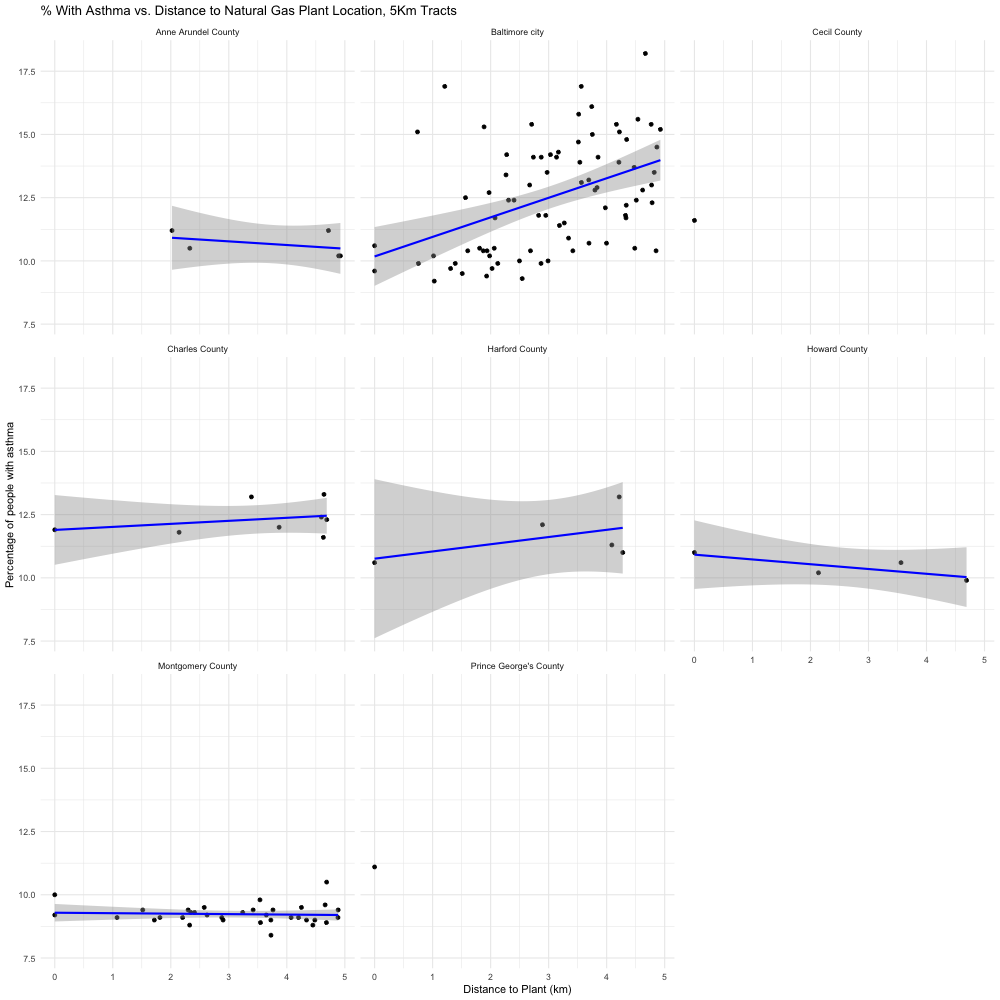

In [222]:
%%R -h 1000 -w 1000

    ggplot(df_md_5_km) +
    aes(x=distance_to_plant, y=E_ASTHMA) +
    geom_point() +
    facet_wrap(~COUNTY_x) +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "% With Asthma vs. Distance to Natural Gas Plant Location, 5Km Tracts",
            x = "Distance to Plant (km)",
            y = "Percentage of people with asthma"
          ) +
          theme_minimal()

### Explanation ###


In [111]:
%%R

model <- lm(distance_to_plant ~ E_ASTHMA, data=df_md_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_ASTHMA, data = df_md_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.1624 -1.9528  0.4185  2.2861  3.8168 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.02507    0.83572   7.209 2.79e-12 ***
E_ASTHMA     0.01154    0.07165   0.161    0.872    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.633 on 404 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  6.418e-05,	Adjusted R-squared:  -0.002411 
F-statistic: 0.02593 on 1 and 404 DF,  p-value: 0.8722



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: 
R[write to console]: In qt((1 - level)/2, df) :
R[write to console]:  NaNs produced

R[write to console]: 3: Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`). 

R[write to console]: 4: 
R[write to console]: In max(ids, na.rm = TRUE) :
R[write to console]: 
 
R[write to console]:  no non-missing arguments to max; returning -Inf



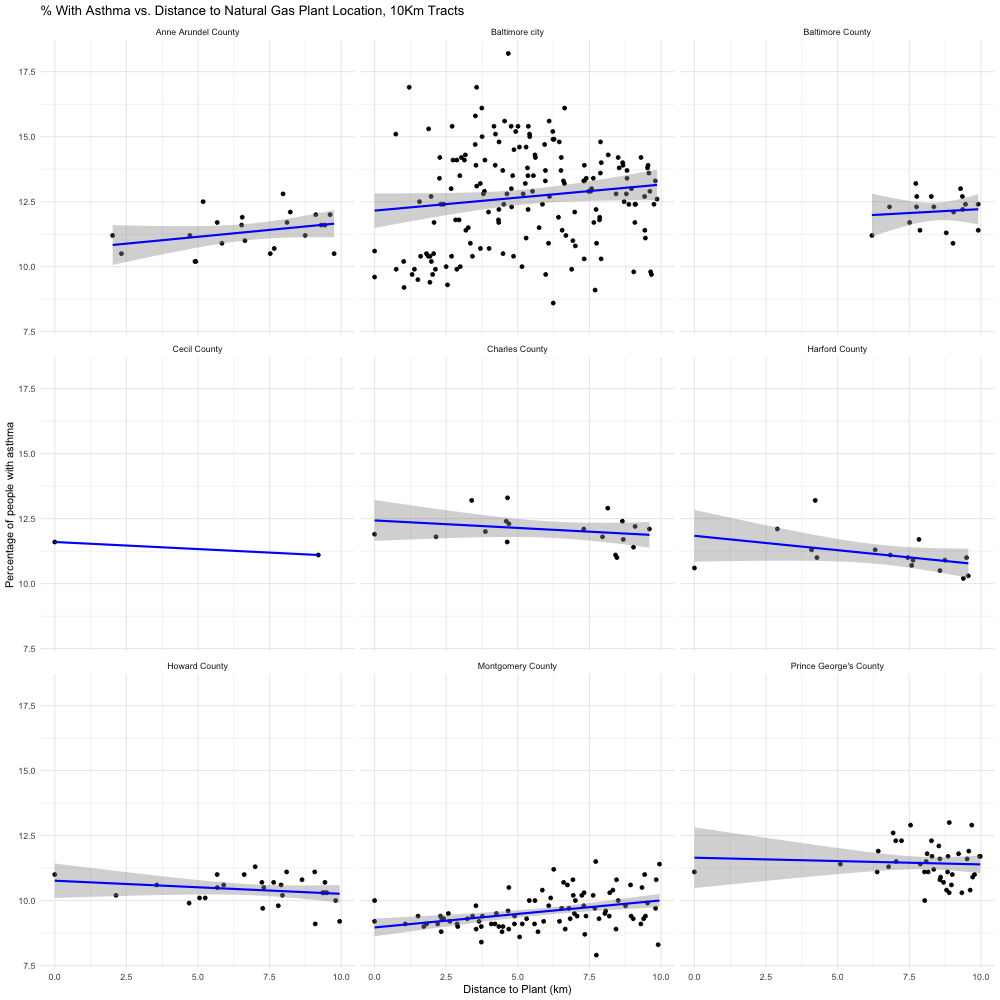

In [240]:
%%R -h 1000 -w 1000

    ggplot(df_md_10_km) +
    aes(x=distance_to_plant, y=E_ASTHMA) +
    geom_point() +
    facet_wrap(~COUNTY_x) +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "% With Asthma vs. Distance to Natural Gas Plant Location, 10Km Tracts",
            x = "Distance to Plant (km)",
            y = "Percentage of people with asthma"
          ) +
          theme_minimal()

In [114]:
%%R

model <- lm(distance_to_plant ~ E_ASTHMA, data=df_md_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_ASTHMA, data = df_md_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.4386  -3.2294   0.0459   3.7665   9.7621 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  19.2731     1.1420  16.876  < 2e-16 ***
E_ASTHMA     -0.7429     0.1017  -7.308 5.71e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.855 on 959 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.05275,	Adjusted R-squared:  0.05176 
F-statistic: 53.41 on 1 and 959 DF,  p-value: 5.706e-13



## People have higher rates of asthma closer to plant locations (highest appears around 2.5km from a plant)

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`). 



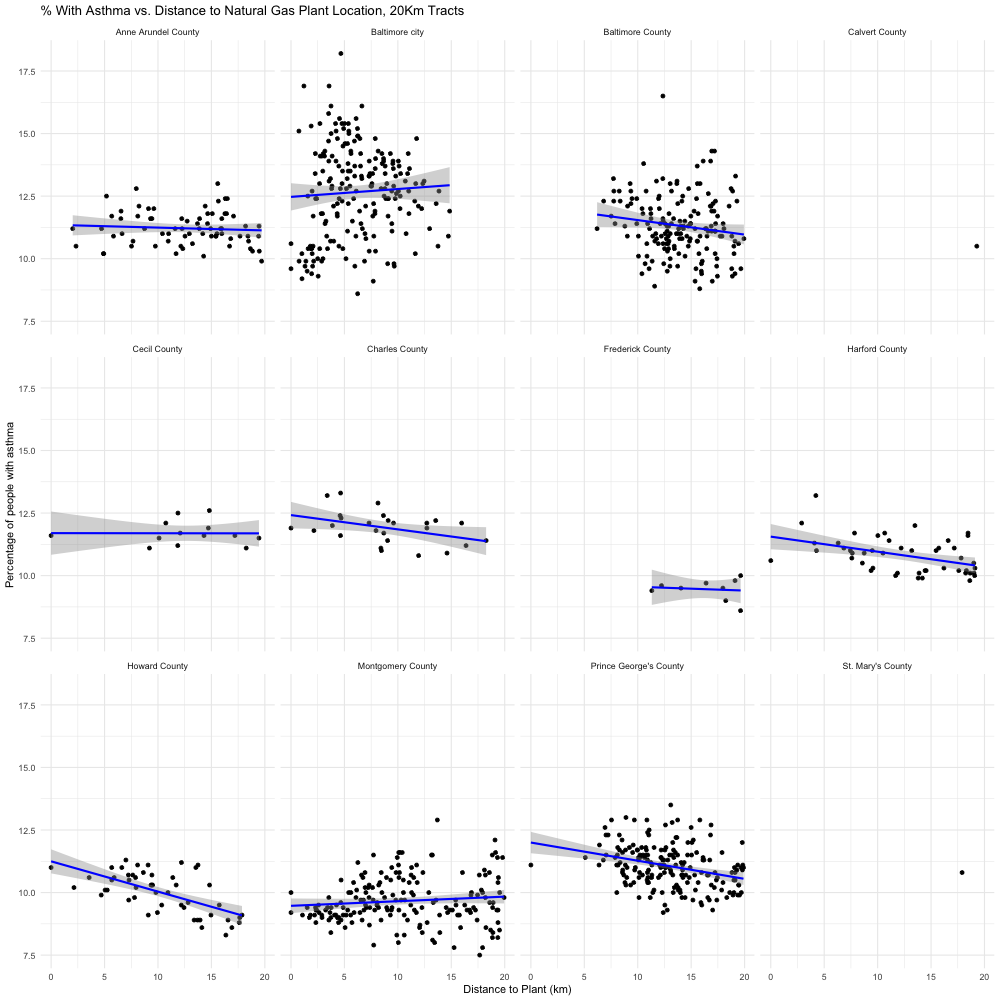

In [238]:
%%R -h 1000 -w 1000

    ggplot(df_md_20_km) +
    aes(x=distance_to_plant, y=E_ASTHMA) +
    geom_point() +
    facet_wrap(~COUNTY_x) +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "% With Asthma vs. Distance to Natural Gas Plant Location, 20Km Tracts",
            x = "Distance to Plant (km)",
            y = "Percentage of people with asthma"
          ) +
          theme_minimal()

### Explanation ###


`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`). 



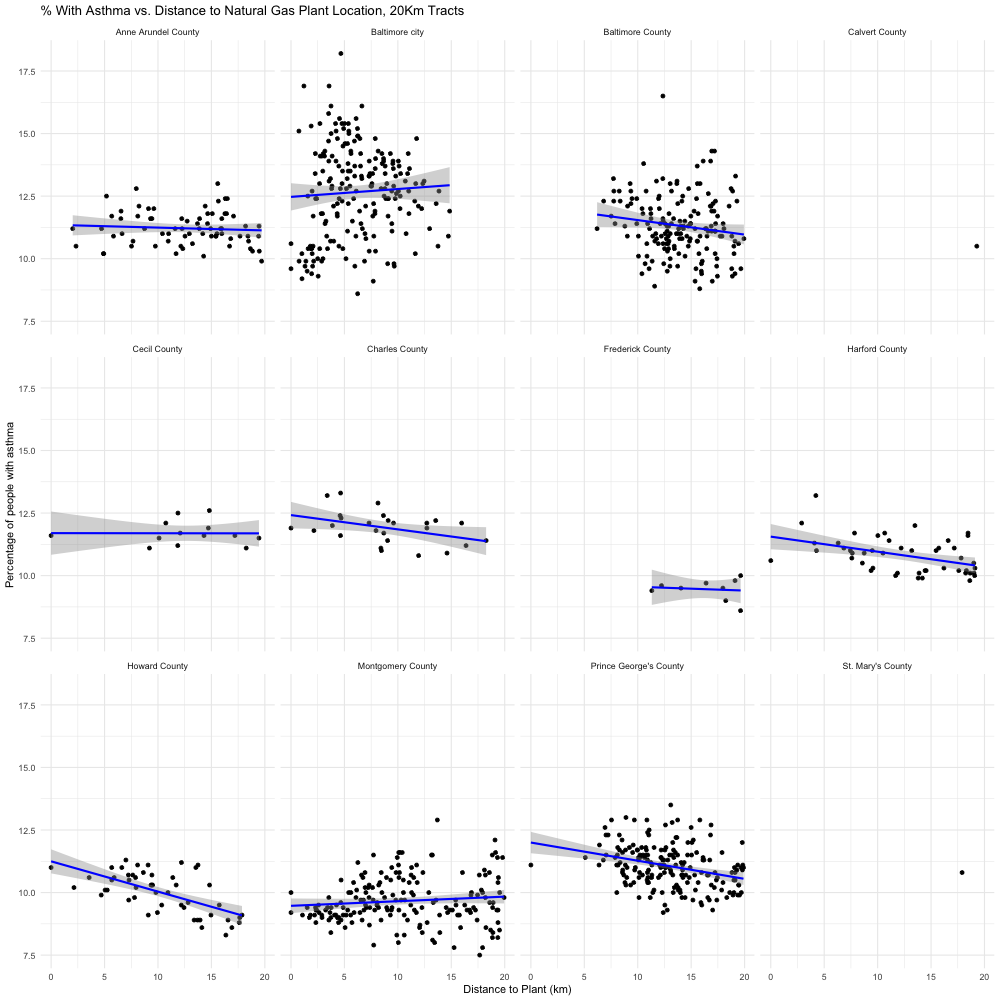

In [237]:
%%R -h 1000 -w 1000

    ggplot(df_md_20_km) +
    aes(x=distance_to_plant, y=E_ASTHMA) +
    geom_point() +
    facet_wrap(~COUNTY_x) +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "% With Asthma vs. Distance to Natural Gas Plant Location, 20Km Tracts",
            x = "Distance to Plant (km)",
            y = "Percentage of people with asthma"
          ) +
          theme_minimal()

### Explanation ###


In [118]:
%%R

model <- lm(distance_to_plant ~ E_ASTHMA + E_POV200, data=df_md_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_ASTHMA + E_POV200, data = df_md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9537 -0.8418  0.1650  1.0677  2.2109 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  2.44234    1.04768   2.331   0.0212 *
E_ASTHMA     0.02081    0.11682   0.178   0.8589  
E_POV200     0.01261    0.01151   1.095   0.2755  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.347 on 133 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.05583,	Adjusted R-squared:  0.04163 
F-statistic: 3.932 on 2 and 133 DF,  p-value: 0.02192



In [119]:
%%R

model <- lm(distance_to_plant ~ E_ASTHMA + E_POV200, data=df_md_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_ASTHMA + E_POV200, data = df_md_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6773 -1.8059  0.5329  1.9808  4.3293 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.03378    1.19835   1.697 0.090443 .  
E_ASTHMA     0.49857    0.12757   3.908 0.000109 ***
E_POV200    -0.05741    0.01258  -4.563 6.73e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.561 on 401 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.04941,	Adjusted R-squared:  0.04467 
F-statistic: 10.42 on 2 and 401 DF,  p-value: 3.871e-05



In [120]:
%%R

model <- lm(distance_to_plant ~ E_ASTHMA + E_POV200, data=df_md_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_ASTHMA + E_POV200, data = df_md_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.4462  -3.3032   0.0703   3.7382  10.3026 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15.03491    1.54047   9.760  < 2e-16 ***
E_ASTHMA    -0.22535    0.16239  -1.388    0.166    
E_POV200    -0.06284    0.01555  -4.041 5.75e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.806 on 956 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.06867,	Adjusted R-squared:  0.06672 
F-statistic: 35.24 on 2 and 956 DF,  p-value: 1.707e-15



### Explanation ###


In [121]:
%%R

model <- lm(distance_to_plant ~ E_PM, data=df_md_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_PM, data = df_md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2484 -0.9288  0.2516  1.0935  1.9488 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.2484     0.1742  18.648   <2e-16 ***
E_PM         -3.6472     2.5349  -1.439    0.152    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.363 on 137 degrees of freedom
Multiple R-squared:  0.01489,	Adjusted R-squared:  0.007695 
F-statistic:  2.07 on 1 and 137 DF,  p-value: 0.1525



`geom_smooth()` using formula = 'y ~ x'


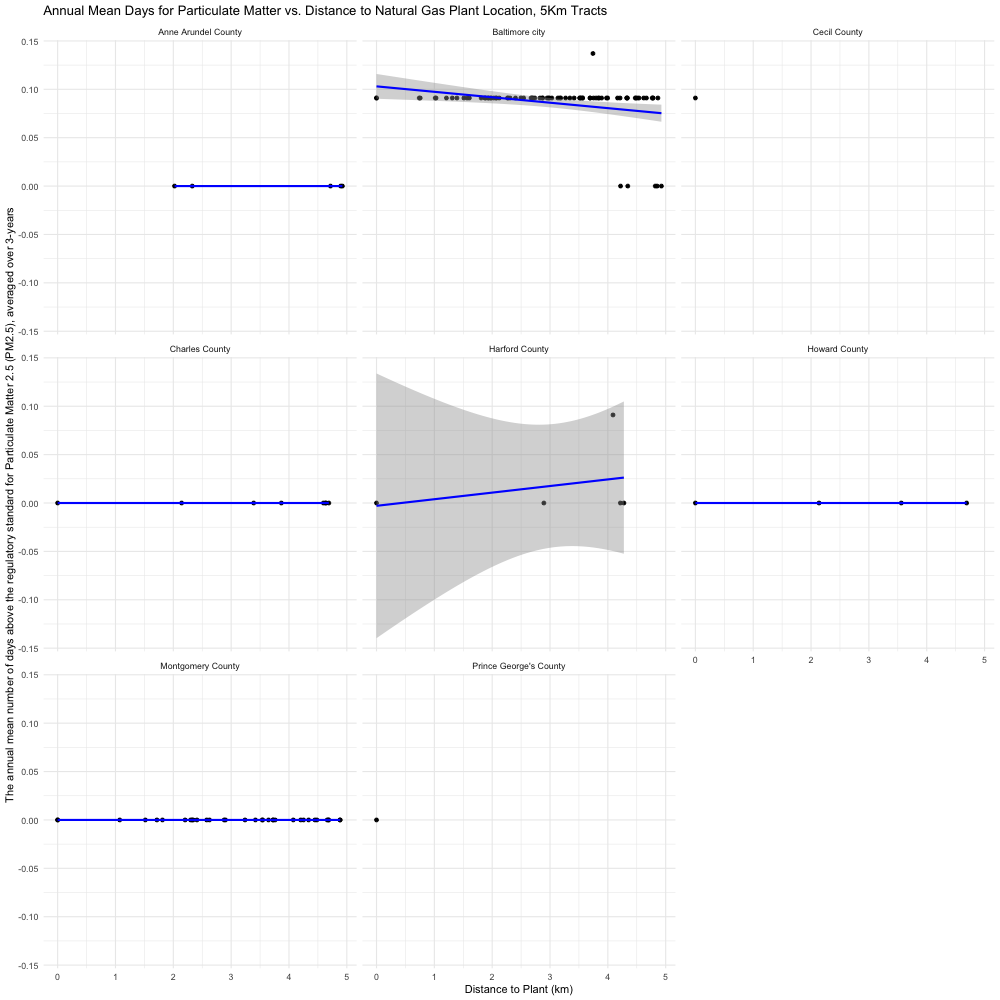

In [235]:
%%R -h 1000 -w 1000

    ggplot(df_md_5_km) +
    aes(x=distance_to_plant, y=E_PM) +
    geom_point() +
    facet_wrap(~COUNTY_x) +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "Annual Mean Days for Particulate Matter vs. Distance to Natural Gas Plant Location, 5Km Tracts",
            x = "Distance to Plant (km)",
            y = "The annual mean number of days above the regulatory standard for Particulate Matter 2.5 (PM2.5), averaged over 3-years"
          ) +
          theme_minimal()

### Explanation ###


In [124]:
%%R

model <- lm(distance_to_plant ~ E_PM, data=df_md_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_PM, data = df_md_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8383 -1.7723  0.2173  1.9034  5.1469 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    6.838      0.147  46.534  < 2e-16 ***
E_PM         -22.832      2.812  -8.119 5.69e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.444 on 406 degrees of freedom
Multiple R-squared:  0.1397,	Adjusted R-squared:  0.1376 
F-statistic: 65.92 on 1 and 406 DF,  p-value: 5.687e-15



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In qt((1 - level)/2, df) :
R[write to console]:  NaNs produced

R[write to console]: 2: 
R[write to console]: In max(ids, na.rm = TRUE) :
R[write to console]: 
 
R[write to console]:  no non-missing arguments to max; returning -Inf



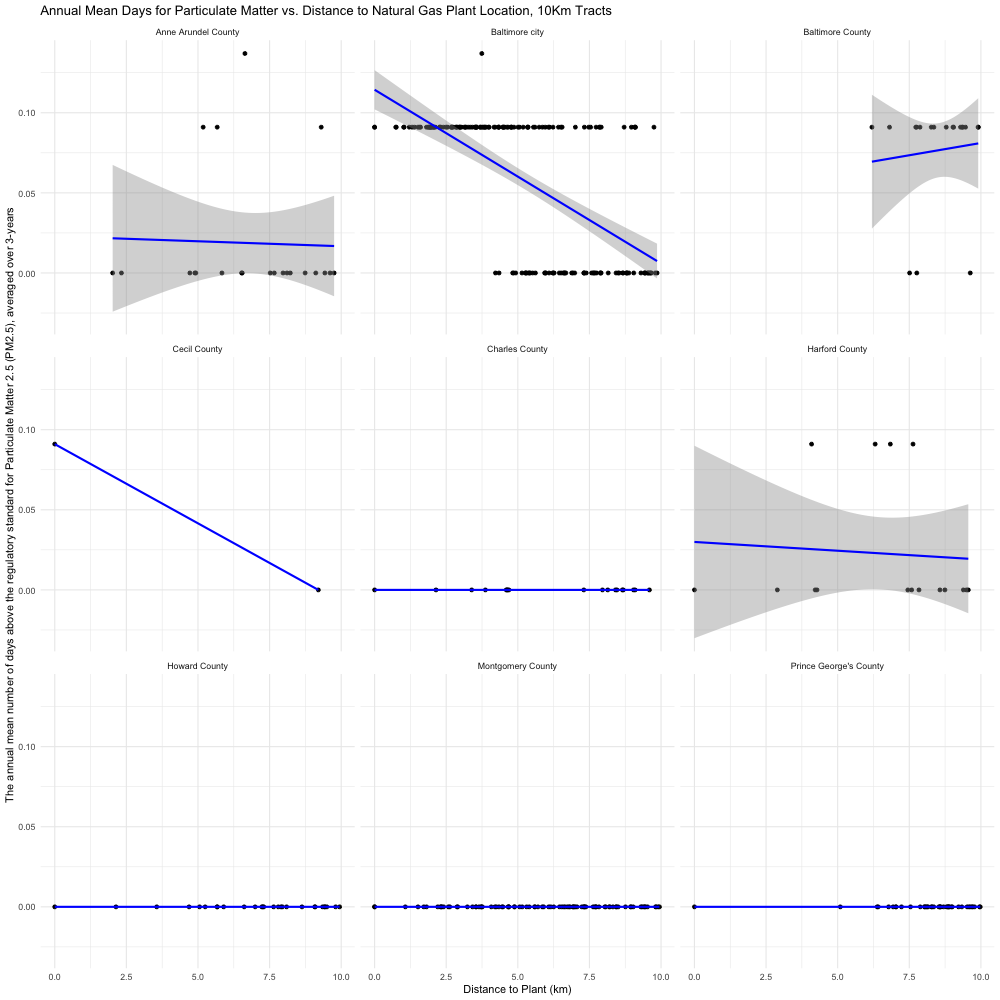

In [233]:
%%R -h 1000 -w 1000

    ggplot(df_md_10_km) +
    aes(x=distance_to_plant, y=E_PM) +
    geom_point() +
    facet_wrap(~COUNTY_x) +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "Annual Mean Days for Particulate Matter vs. Distance to Natural Gas Plant Location, 10Km Tracts",
            x = "Distance to Plant (km)",
            y = "The annual mean number of days above the regulatory standard for Particulate Matter 2.5 (PM2.5), averaged over 3-years"
          ) +
          theme_minimal()

In [127]:
%%R

model <- lm(distance_to_plant ~ E_PM, data=df_md_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_PM, data = df_md_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.7834  -3.6821  -0.1509   3.7314  11.4200 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11.7834     0.1715   68.71   <2e-16 ***
E_PM        -41.3841     4.0938  -10.11   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.743 on 961 degrees of freedom
Multiple R-squared:  0.09612,	Adjusted R-squared:  0.09518 
F-statistic: 102.2 on 1 and 961 DF,  p-value: < 2.2e-16



## Tracts closer to plant locations have higher annual mean number of days above the regulatory standard for Particulate Matter 2.5 (PM2.5), averaged over 3-years. So, they are already more vulnerable to air pollution.

`geom_smooth()` using formula = 'y ~ x'


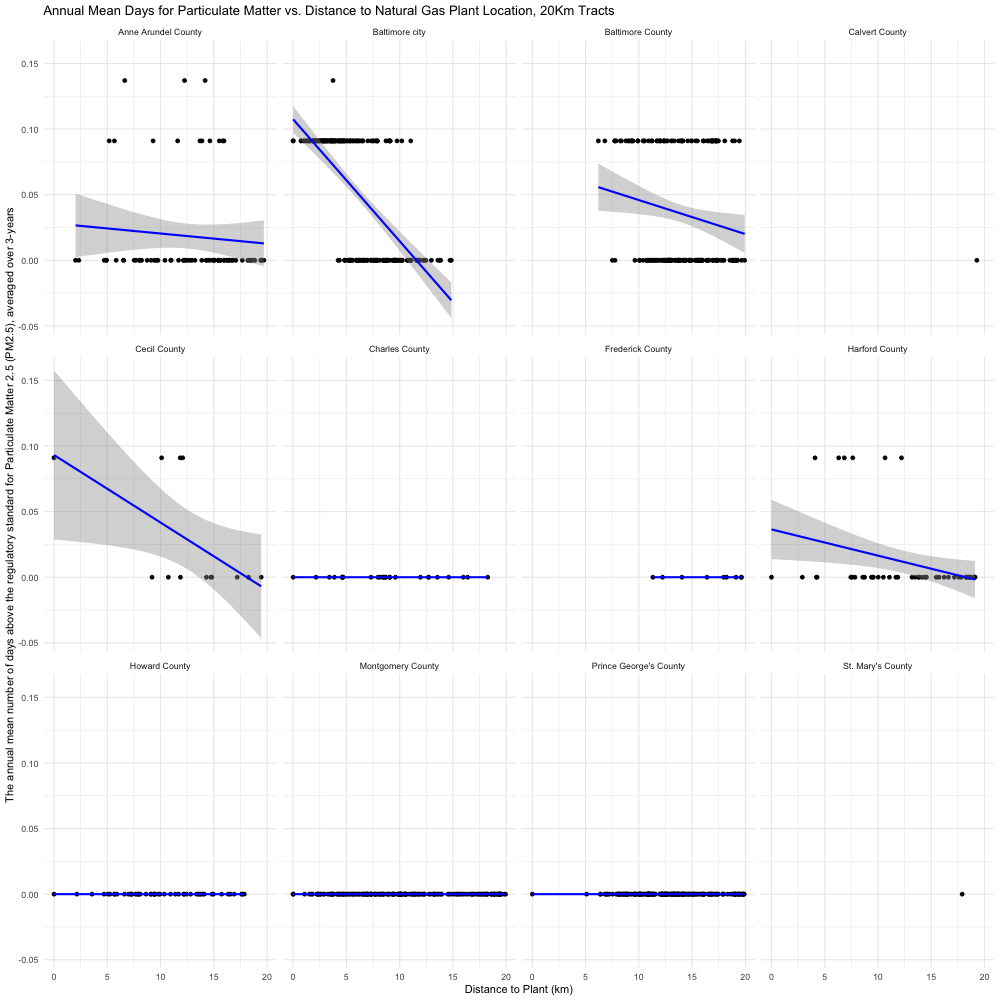

In [231]:
%%R -h 1000 -w 1000

    ggplot(df_md_20_km) +
    aes(x=distance_to_plant, y=E_PM) +
    geom_point() +
    facet_wrap(~COUNTY_x) +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "Annual Mean Days for Particulate Matter vs. Distance to Natural Gas Plant Location, 20Km Tracts",
            x = "Distance to Plant (km)",
            y = "The annual mean number of days above the regulatory standard for Particulate Matter 2.5 (PM2.5), averaged over 3-years"
          ) +
          theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


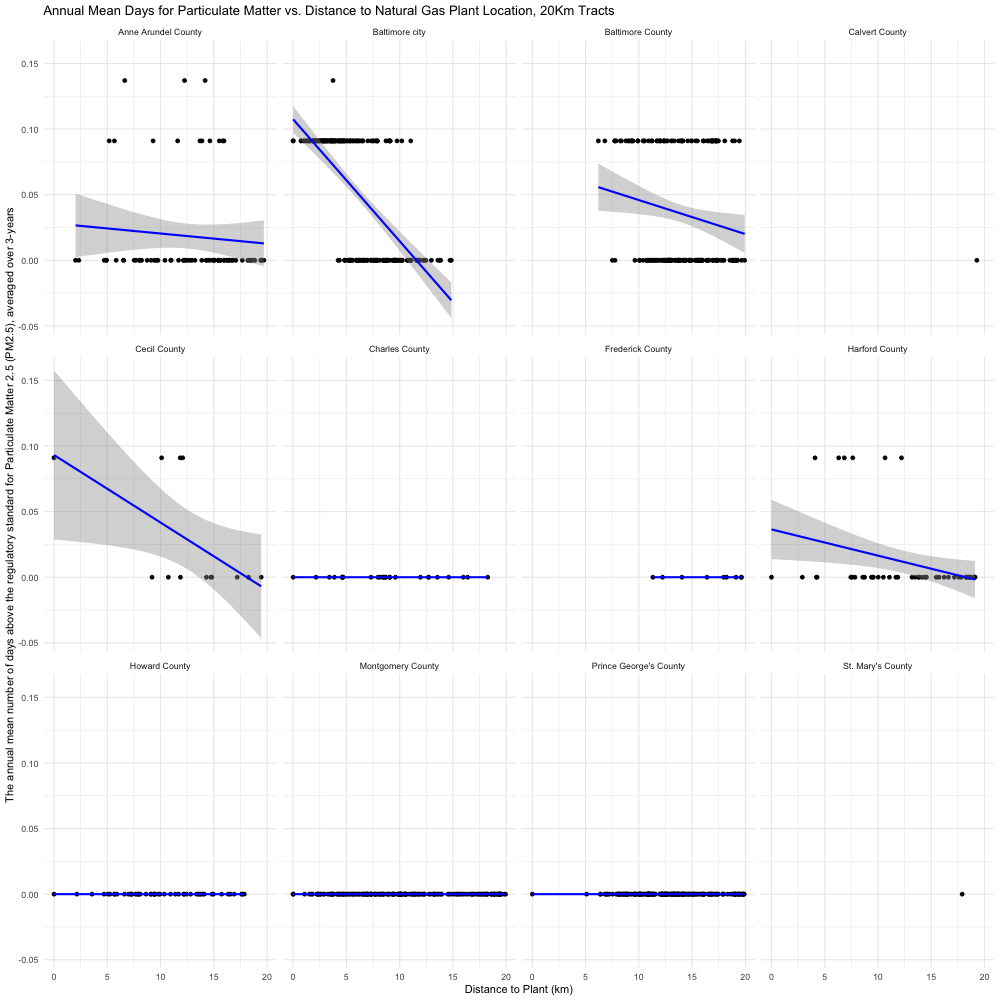

In [230]:
%%R -h 1000 -w 1000

    ggplot(df_md_20_km) +
    aes(x=distance_to_plant, y=E_PM) +
    geom_point() +
    facet_wrap(~COUNTY_x) +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "Annual Mean Days for Particulate Matter vs. Distance to Natural Gas Plant Location, 20Km Tracts",
            x = "Distance to Plant (km)",
            y = "The annual mean number of days above the regulatory standard for Particulate Matter 2.5 (PM2.5), averaged over 3-years"
          ) +
          theme_minimal()

In [131]:
%%R

model <- lm(distance_to_plant ~ E_OZONE, data=df_md_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_OZONE, data = df_md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1675 -0.9504  0.2371  1.1919  1.9090 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.1675     0.2331  13.588   <2e-16 ***
E_OZONE      -0.1677     0.3176  -0.528    0.598    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.372 on 137 degrees of freedom
Multiple R-squared:  0.00203,	Adjusted R-squared:  -0.005255 
F-statistic: 0.2786 on 1 and 137 DF,  p-value: 0.5984



In [132]:
%%R

model <- lm(distance_to_plant ~ E_OZONE, data=df_md_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_OZONE, data = df_md_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6879 -1.9520  0.4206  2.0999  4.0451 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.6879     0.2447  27.331   <2e-16 ***
E_OZONE      -0.9041     0.3563  -2.537   0.0115 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.614 on 406 degrees of freedom
Multiple R-squared:  0.01561,	Adjusted R-squared:  0.01319 
F-statistic: 6.438 on 1 and 406 DF,  p-value: 0.01154



In [134]:
%%R

model <- lm(distance_to_plant ~ E_OZONE, data=df_md_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_OZONE, data = df_md_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.7580  -3.6714   0.0516   3.8409   9.8556 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11.7580     0.2824  41.635  < 2e-16 ***
E_OZONE      -1.4021     0.4291  -3.267  0.00112 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.961 on 961 degrees of freedom
Multiple R-squared:  0.01099,	Adjusted R-squared:  0.009958 
F-statistic: 10.68 on 1 and 961 DF,  p-value: 0.001124



### Explanation ###


## Coronary heart disease and distance to plant location

In [136]:
%%R

model <- lm(distance_to_plant ~ E_CHD, data=df_md_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_CHD, data = df_md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4668 -0.7865  0.0949  1.0959  2.2345 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.20668    0.30752   7.176 4.22e-11 ***
E_CHD        0.15557    0.05242   2.968  0.00354 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.334 on 136 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.06084,	Adjusted R-squared:  0.05393 
F-statistic:  8.81 on 1 and 136 DF,  p-value: 0.003542



In [137]:
%%R

model <- lm(distance_to_plant ~ E_CHD, data=df_md_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_CHD, data = df_md_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6249 -2.0549  0.5071  2.2602  4.0370 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.0103     0.4217   11.88  < 2e-16 ***
E_CHD         0.1993     0.0697    2.86  0.00446 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.607 on 404 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.01984,	Adjusted R-squared:  0.01741 
F-statistic: 8.178 on 1 and 404 DF,  p-value: 0.00446



In [138]:
%%R

model <- lm(distance_to_plant ~ E_CHD, data=df_md_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_CHD, data = df_md_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.1480  -3.5820   0.0509   3.8282   8.9726 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.64916    0.56525  18.840   <2e-16 ***
E_CHD        0.06158    0.09348   0.659     0.51    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.988 on 959 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.0004523,	Adjusted R-squared:  -0.0005899 
F-statistic: 0.434 on 1 and 959 DF,  p-value: 0.5102



### Explanation ###


In [139]:
%%R

model <- lm(distance_to_plant ~ E_CANCER, data=df_md_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_CANCER, data = df_md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1690 -0.9199  0.1926  1.2002  1.9294 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.85608    0.32220   8.864  3.8e-15 ***
E_CANCER     0.03365    0.05081   0.662    0.509    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.375 on 136 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.003215,	Adjusted R-squared:  -0.004115 
F-statistic: 0.4386 on 1 and 136 DF,  p-value: 0.5089



In [140]:
%%R

model <- lm(distance_to_plant ~ E_CANCER, data=df_md_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_CANCER, data = df_md_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6734 -2.0245  0.4325  2.2230  4.0474 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.15483    0.41533  12.411   <2e-16 ***
E_CANCER     0.16329    0.06423   2.542   0.0114 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.612 on 404 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.01575,	Adjusted R-squared:  0.01331 
F-statistic: 6.464 on 1 and 404 DF,  p-value: 0.01138



In [141]:
%%R

model <- lm(distance_to_plant ~ E_CANCER, data=df_md_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_CANCER, data = df_md_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.1450  -3.5105  -0.0028   3.7289   9.8802 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.08687    0.46918  17.236  < 2e-16 ***
E_CANCER     0.43636    0.06607   6.605 6.59e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.879 on 959 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.04351,	Adjusted R-squared:  0.04251 
F-statistic: 43.62 on 1 and 959 DF,  p-value: 6.591e-11



### Explanation ###


In [142]:
%%R

model <- lm(distance_to_plant ~ SPL_EBM_DOM1, data=df_md_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ SPL_EBM_DOM1, data = df_md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1805 -0.9322  0.2393  1.1585  1.8812 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.26591    0.50367   6.484  1.5e-09 ***
SPL_EBM_DOM1 -0.08896    0.21265  -0.418    0.676    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.373 on 137 degrees of freedom
Multiple R-squared:  0.001276,	Adjusted R-squared:  -0.006014 
F-statistic: 0.175 on 1 and 137 DF,  p-value: 0.6764



In [144]:
%%R

model <- lm(distance_to_plant ~ SPL_EBM_DOM1, data=df_md_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ SPL_EBM_DOM1, data = df_md_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1502 -1.7181  0.2661  1.9034  4.8473 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    9.8297     0.5506  17.853  < 2e-16 ***
SPL_EBM_DOM1  -1.7503     0.2554  -6.853  2.7e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.492 on 405 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.1039,	Adjusted R-squared:  0.1017 
F-statistic: 46.97 on 1 and 405 DF,  p-value: 2.699e-11



In [146]:
%%R

model <- lm(distance_to_plant ~ SPL_EBM_DOM1, data=df_md_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ SPL_EBM_DOM1, data = df_md_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.6963  -3.5905  -0.0921   3.6835  11.3740 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    18.270      0.658   27.77   <2e-16 ***
SPL_EBM_DOM1   -3.724      0.328  -11.35   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.687 on 960 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.1184,	Adjusted R-squared:  0.1175 
F-statistic: 128.9 on 1 and 960 DF,  p-value: < 2.2e-16



### Explanation ###
